# Avocado Project

## Adeeb Naiyer
## Batch DS2402

# Project Description


This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags


The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation\

•	Total Volume - Total number of avocados sold
 
•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold

## Inspiration /Label
 
The dataset can be seen in two angles to find the region and find the average price.

Task: One of Classification and other of Regressio.

Do both tasks in the same .ipynb file and submit at single file.

## Dataset Link-

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import zipfile
warnings.filterwarnings('ignore')

In [2]:
# Open the zip file
zf = zipfile.ZipFile('avocado.csv.zip') 

# Extract the csv file
df = pd.read_csv(zf.open('avocado.csv'))
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

# 1. EDA Exploratory Data Analysis

## 1.1 Dimension

In [3]:
# checking the dimension of the dataset
df.shape

(18249, 14)

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

### we will quickly drop the old index: Unnnamed

In [5]:
# Drop the first column with the old index
df.drop("Unnamed: 0", axis=1,inplace=True)

In [6]:
df.shape

(18249, 13)

In [7]:
# checking column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


## 1.2 Missing values

In [8]:
# checking null values
miss_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
miss_val["% of missing values"] = round(miss_val['Null values'] / len(df) * 100,2)

miss_val

Null values  % of missing values
Date                    0                  0.0
AveragePrice            0                  0.0
Total Volume            0                  0.0
4046                    0                  0.0
4225                    0                  0.0
4770                    0                  0.0
Total Bags              0                  0.0
Small Bags              0                  0.0
Large Bags              0                  0.0
XLarge Bags             0                  0.0
type                    0                  0.0
year                    0                  0.0
region                  0                  0.0

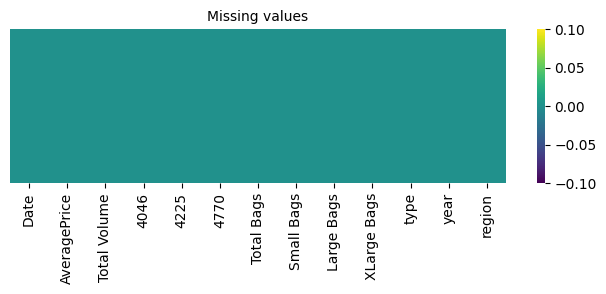

In [9]:
plt.figure(figsize=(8, 2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')
plt.title('Missing values', fontsize=10)
plt.show()

## 1.3 Duplicates

In [10]:
df[df.duplicated()].shape

(0, 13)

There are 0 duplicates values

## 1.4 Feature analysis

In [11]:
# number of unique values in each feature and the target
df_info = df.nunique().to_frame('No. of unique values')
df_info['type'] = df.dtypes.values
df_info

No. of unique values     type
Date                           169   object
AveragePrice                   259  float64
Total Volume                 18237  float64
4046                         17702  float64
4225                         18103  float64
4770                         12071  float64
Total Bags                   18097  float64
Small Bags                   17321  float64
Large Bags                   15082  float64
XLarge Bags                   5588  float64
type                             2   object
year                             4    int64
region                          54   object

• Average price is the target variable in regression problem since it is continous and numerical

• Region is the target variable in classification problem since it is discrete with 54 uniques values

• tHE COLUMNS type and year are catagorical with 2 and 4 discrete values

## Region target unique values

In [12]:
# unique values of the target variable
column = 'region'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {sorted(df[column].unique())}")

Feature region:
region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chica

### The target variable seems balanced so no need of balancing for classification problem

In [13]:
# unique values of the target variable
column = 'AveragePrice'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {sorted(df[column].unique())}")

Feature AveragePrice:
AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: count, Length: 259, dtype: int64
Unique values: [0.44, 0.46, 0.48, 0.49, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78

### Average price column has 259 unique values . To preedict we will apply a regression model

### Catagorial columns analysiis

In [14]:
cat_col = ['type', 'year']
for column in cat_col:
    print(f"Feature {column}:\n{df[column].value_counts()}")
    print(f"Unique values: {sorted(df[column].unique())}")

Feature type:
type
conventional    9126
organic         9123
Name: count, dtype: int64
Unique values: ['conventional', 'organic']
Feature year:
year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64
Unique values: [2015, 2016, 2017, 2018]


### Other columns analysis

In [15]:
for column in df.columns:
    if (column not in ['type', 'year', 'region', 'AveragePrice']):
        print(f"Feature {column}:")
        print(f"# unique values: {df[column].nunique()}\n")
        print(f"Feature {column}:\n{df[column].value_counts()}")

Feature Date:
# unique values: 169

Feature Date:
Date
2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: count, Length: 169, dtype: int64
Feature Total Volume:
# unique values: 18237

Feature Total Volume:
Total Volume
4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: count, Length: 18237, dtype: int64
Feature 4046:
# unique values: 17702

Feature 4046:
4046
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: count, Length: 17702, dtype: int64
Feature 4225:
# unique values: 18103

Feature 4225:
4225
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
          

## Statistics summary of dataset

In [16]:
stats = df.describe()
stats

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

In [17]:
df.describe(exclude=[np.number])

Date          type  region
count        18249         18249   18249
unique         169             2      54
top     2015-12-27  conventional  Albany
freq           108          9126     338

In [18]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

Total Volume    743267.253009
4046            284363.124531
4225            266093.548356
Total Bags      199895.372060
Small Bags      155831.866696
Large Bags       51690.378145
4770             22654.745993
XLarge Bags       3106.426507
year                 0.147899
AveragePrice         0.035978
dtype: float64

In [19]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

Total Volume    5.474791e+07
4046            1.992063e+07
4225            1.776718e+07
Total Bags      1.716101e+07
Small Bags      1.171004e+07
Large Bags      5.176827e+06
4770            2.308671e+06
XLarge Bags     5.132014e+05
AveragePrice    1.038668e+00
year           -2.777545e-02
dtype: float64

### Observation:

•Theree are no negative values or invalid values

 •Counts of all the colummns are the same so there are no missing values

 •The difference between mean and the median is positive values so all the data is right skewed

 •Since the difference between the max and mean _2 times std dev is positive there are no outliers present in the dataset

## Date Formatting

In [20]:
# convert the Date column into date
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month

In [21]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
month                    int32
dtype: object

In [22]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  month  
0  Albany     12  
1  Albany     12  
2  Albany     12  
3  Albany     12  
4  Albany     11

# 1.5 Data Visualisation

### Univariate analysis

## Target valiables

### Average price:

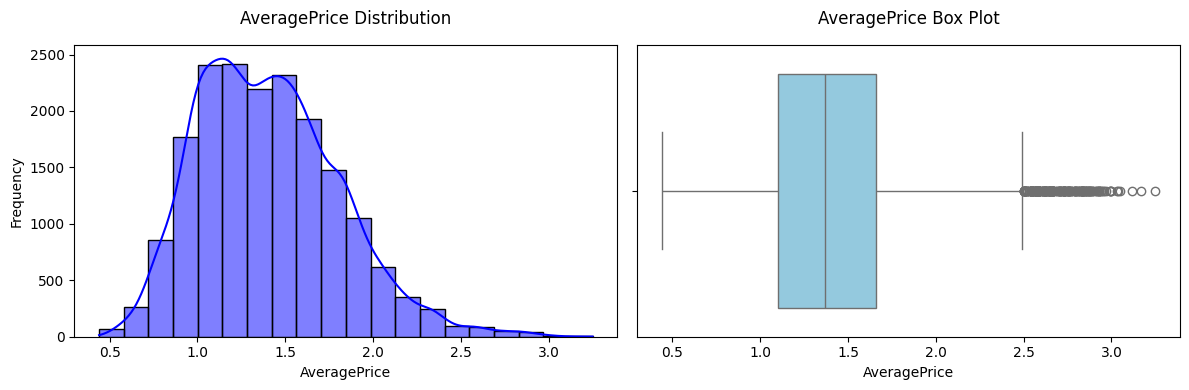

In [23]:
col = 'AveragePrice'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True, bins=20, ax=axes[0], color='blue', edgecolor='black')
axes[0].set_title(f'{col} Distribution', fontsize=12, pad=15)
axes[0].set_xlabel(col, fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)

sns.boxplot(x=df[col], ax=axes[1], color='skyblue')
axes[1].set_title(f'{col} Box Plot', fontsize=12, pad=15)
axes[1].set_xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

The distribution of Average price is right skewed and the boxplot shows outliers

<Figure size 2000x3000 with 0 Axes>

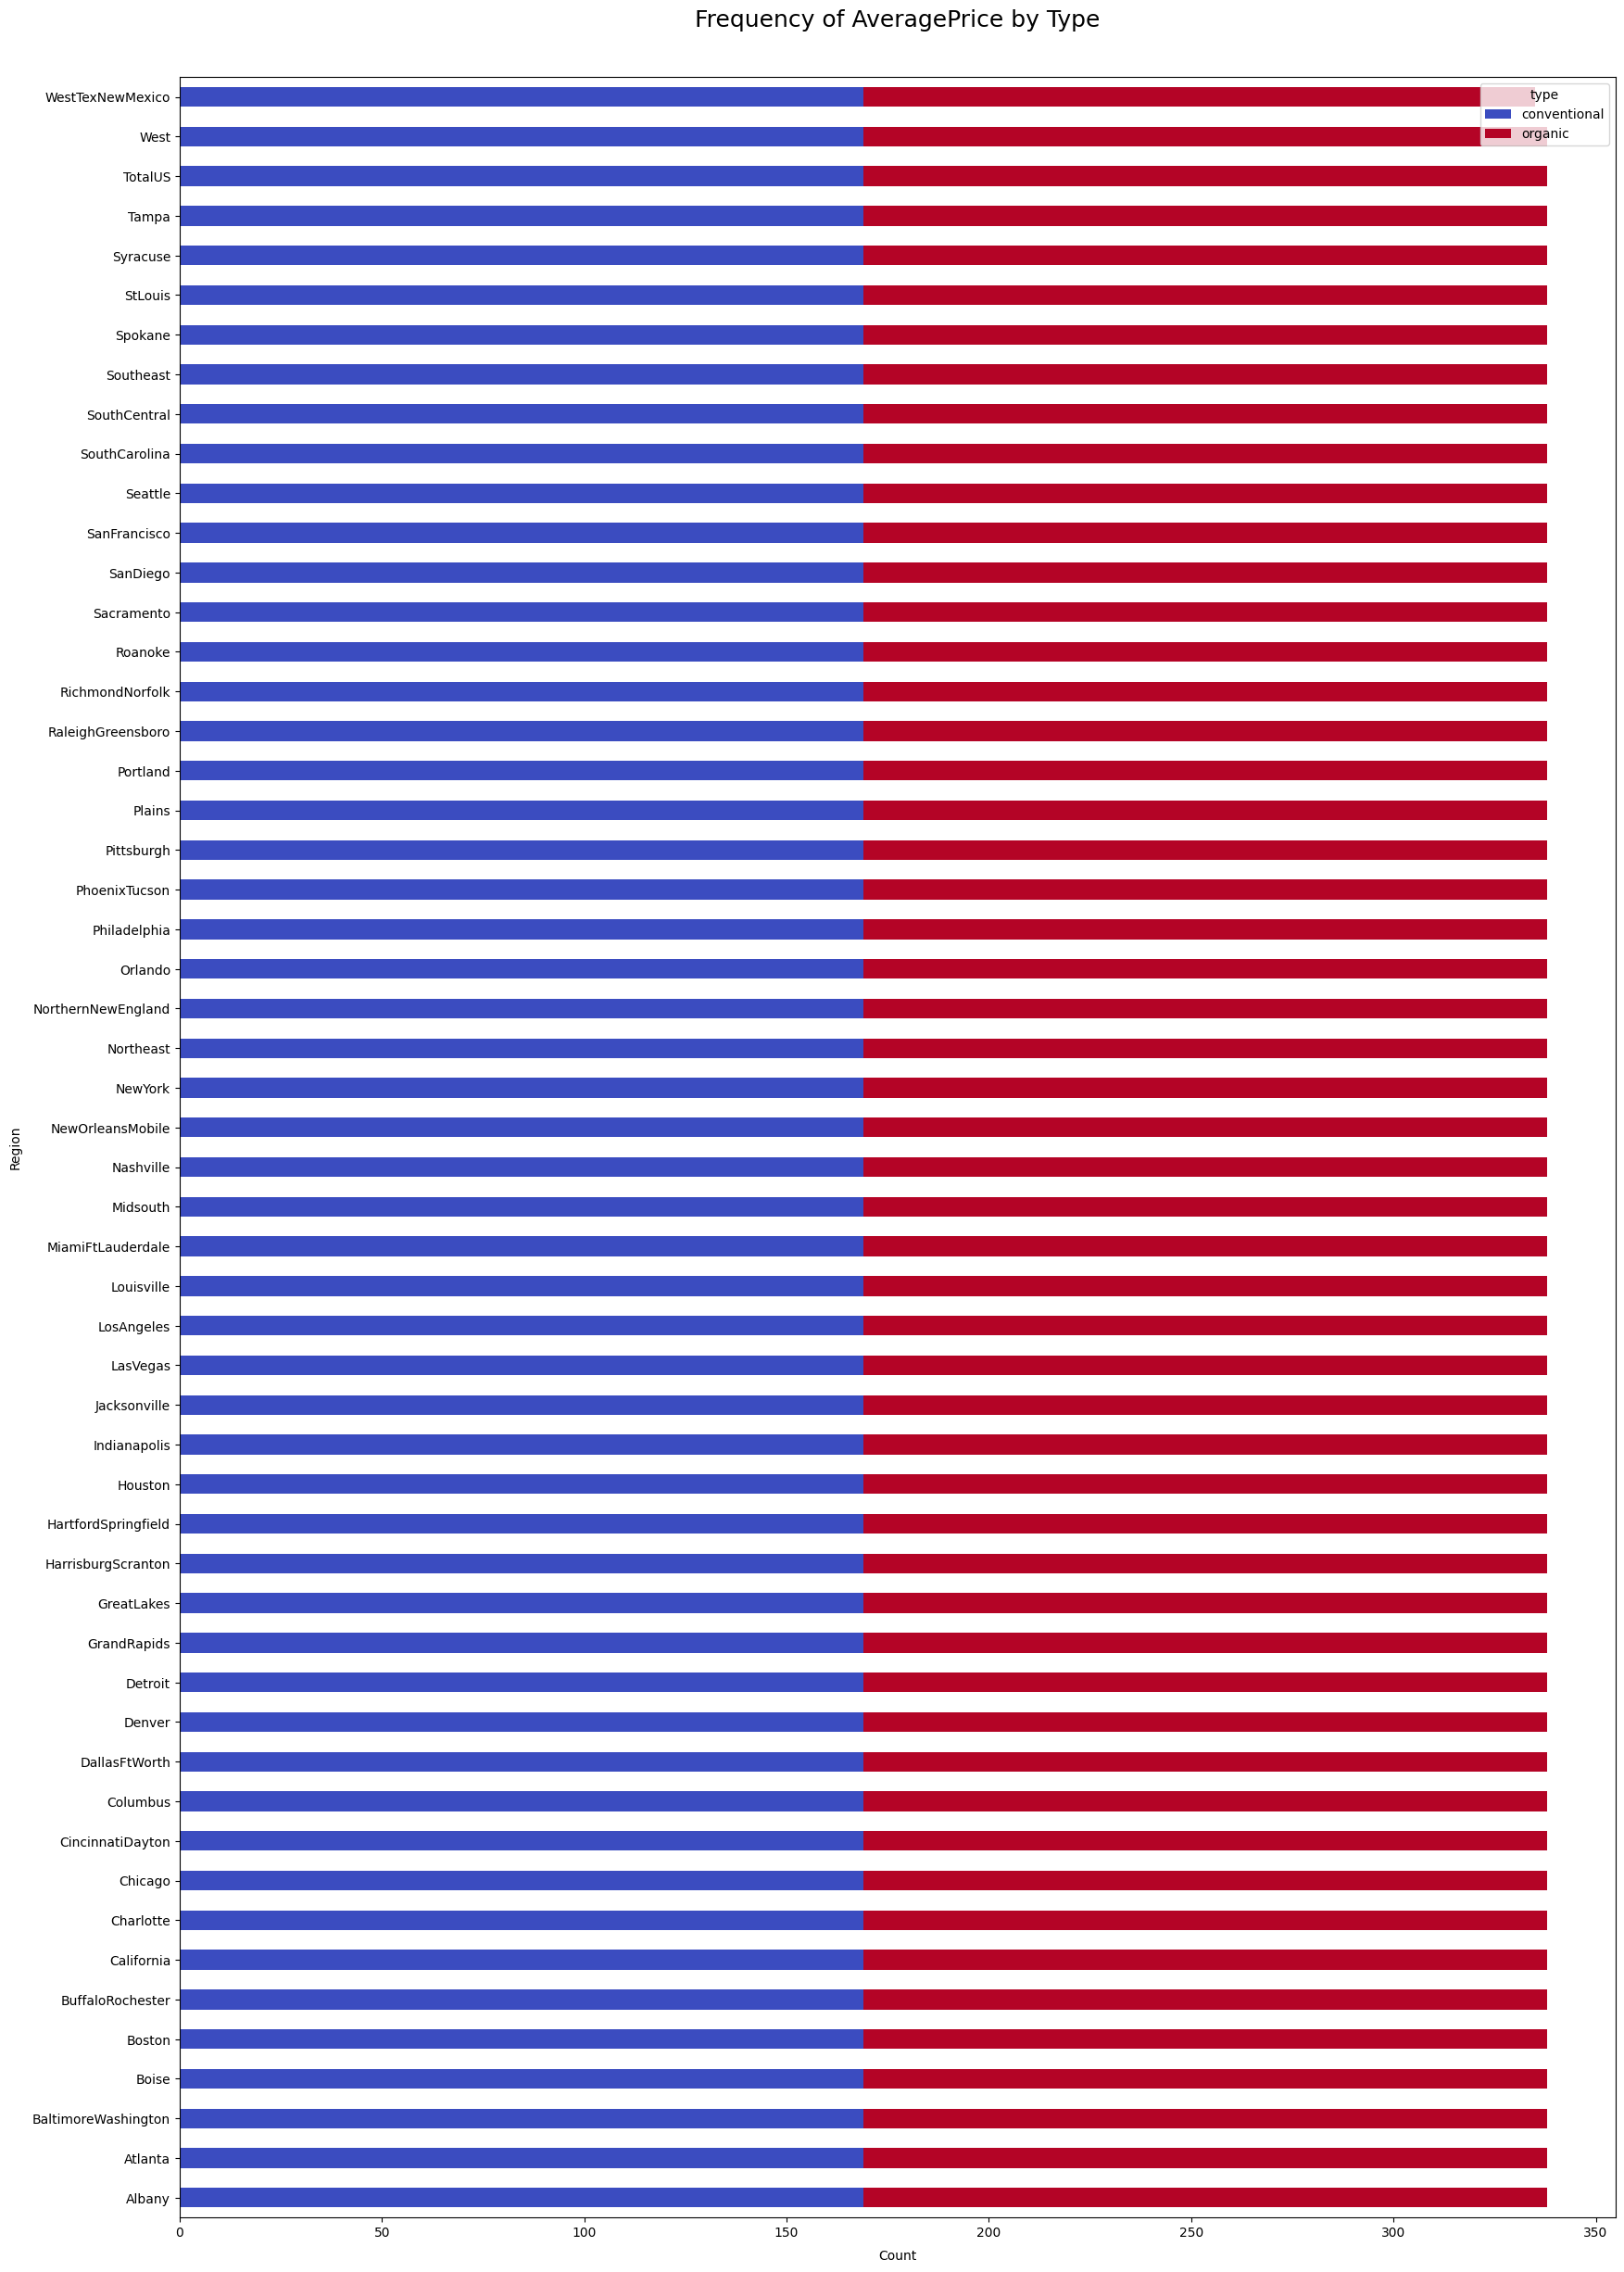

In [24]:
plt.figure(figsize=(20, 30))
region_type_counts = pd.crosstab(df['region'], df['type'])
region_type_counts.plot(kind='barh', stacked=True, figsize=(20, 30), colormap='coolwarm')
plt.title(f"Frequency of {col} by Type", size=18, y=1.02)
plt.xlabel('Count', size=10, labelpad=8)
plt.ylabel('Region', size=10, labelpad=8)
plt.show()

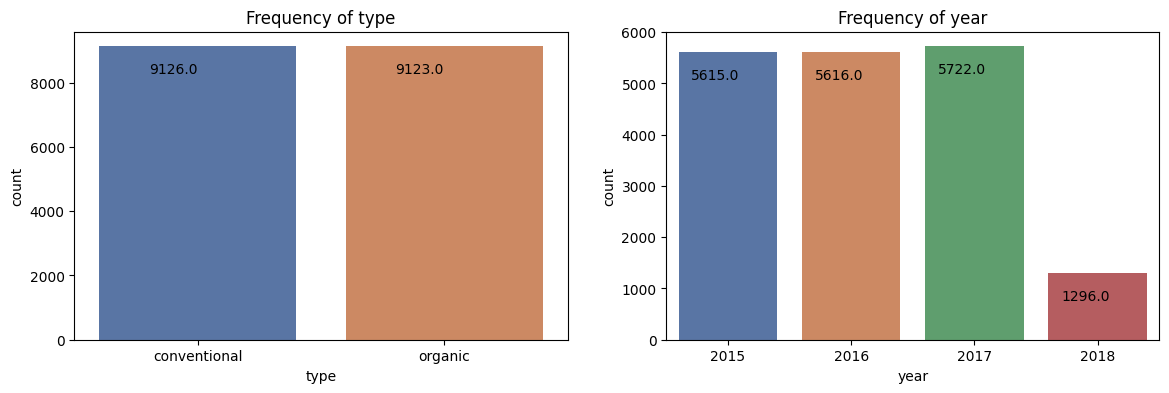

In [25]:
categorical_col = ['type', 'year']

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

for ax, column in zip(axs.flat, categorical_col):
    sns.countplot(data=df, x=column, ax=ax, palette='deep')
    ax.set_title(f"Frequency of {column}")
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.3, p.get_height()), ha='center', va='top', color='black', size=10)

plt.subplots_adjust(hspace=0.5)
plt.show()


Data is almost balanced with the type feature even in year except the 2018 year

In [26]:
num_col = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

In [27]:
for i,col in enumerate(num_col[1:]):
    print(f"{i+1}. {col}")

1. Total Volume
2. 4046
3. 4225
4. 4770
5. Total Bags
6. Small Bags
7. Large Bags
8. XLarge Bags


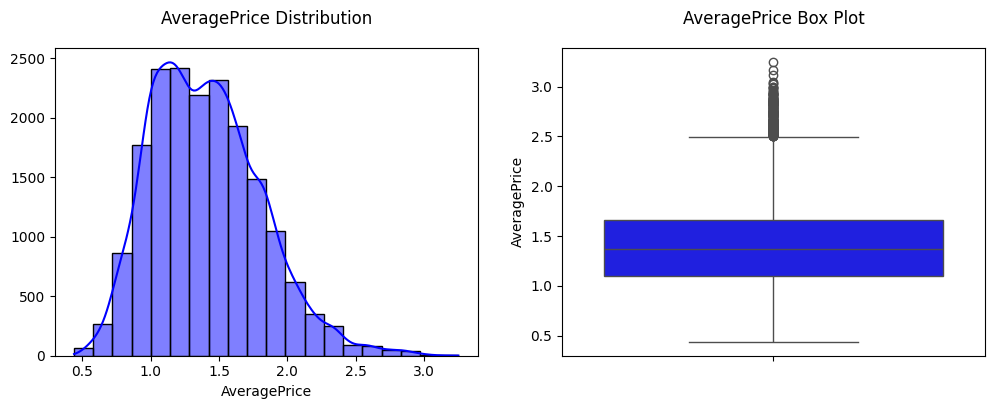

Skewness of AveragePrice: 0.5803027378878419


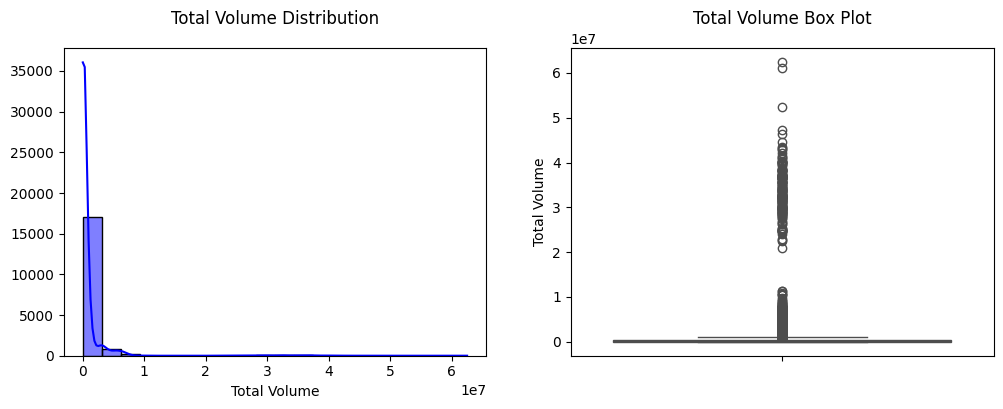

Skewness of Total Volume: 9.00768747885452


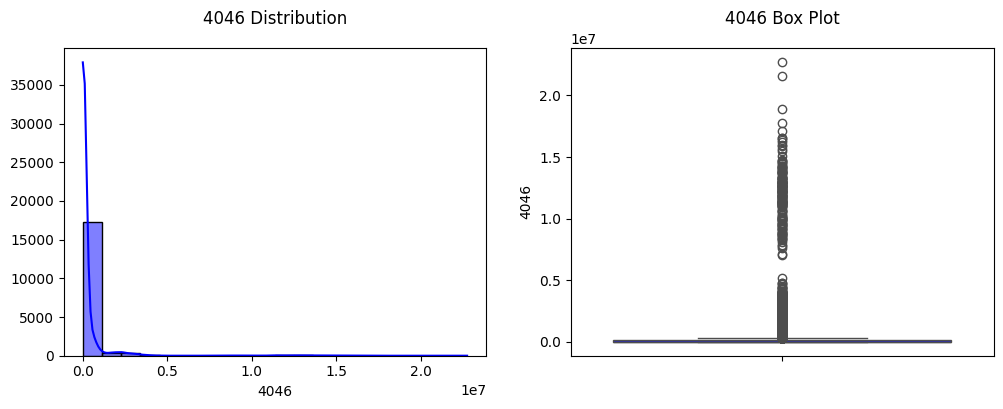

Skewness of 4046: 8.648219757025226


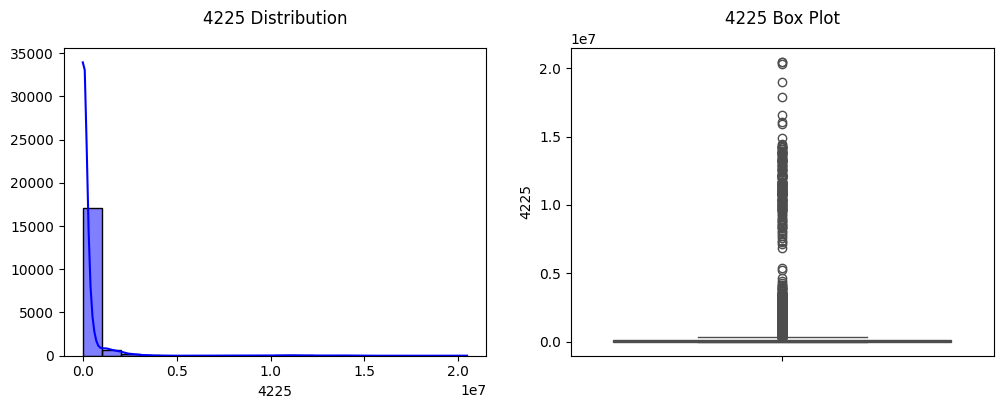

Skewness of 4225: 8.942465607536276


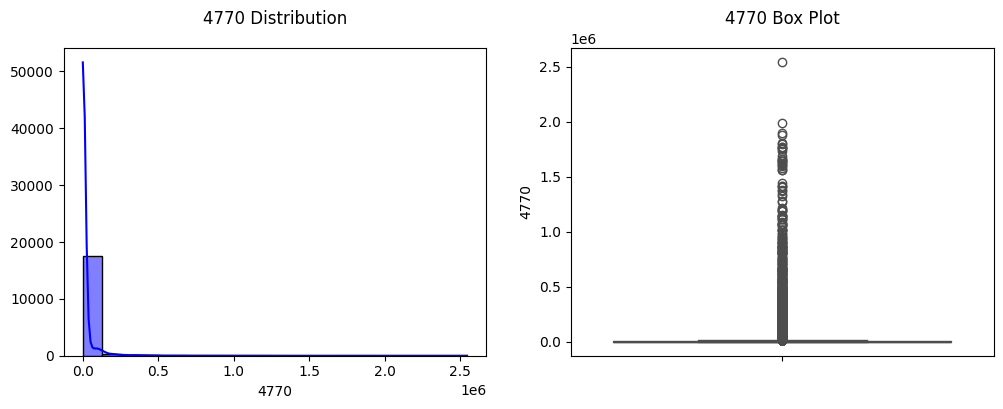

Skewness of 4770: 10.15939562715204


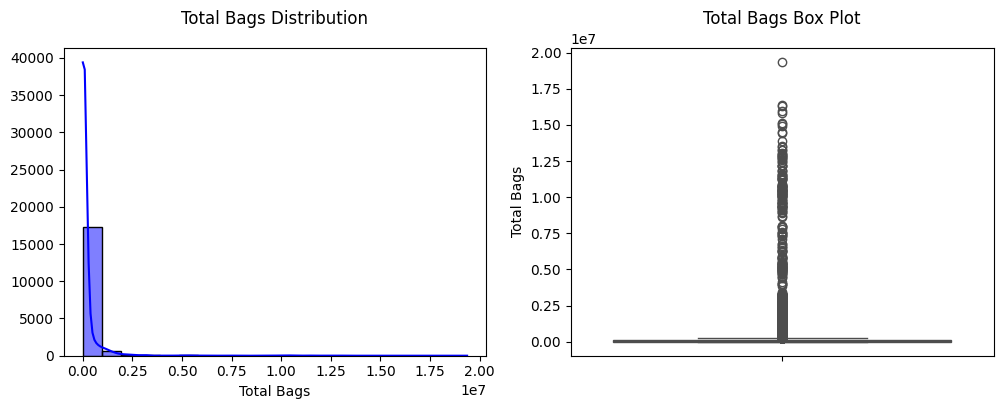

Skewness of Total Bags: 9.756071670300289


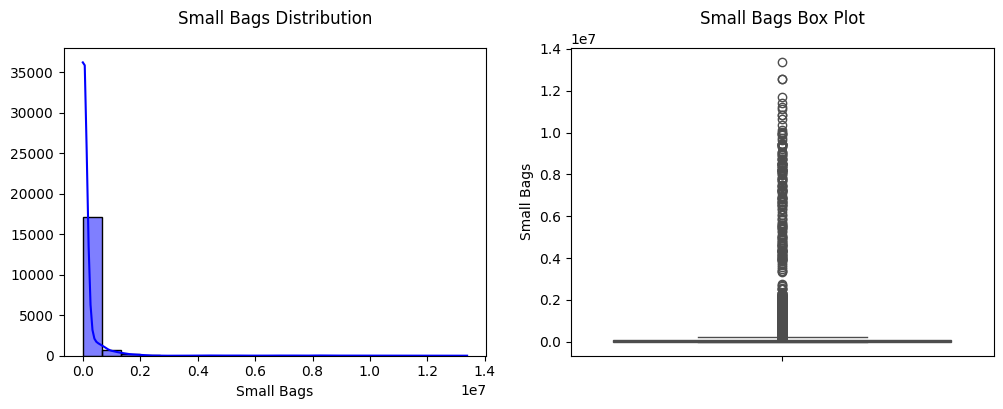

Skewness of Small Bags: 9.540659981758614


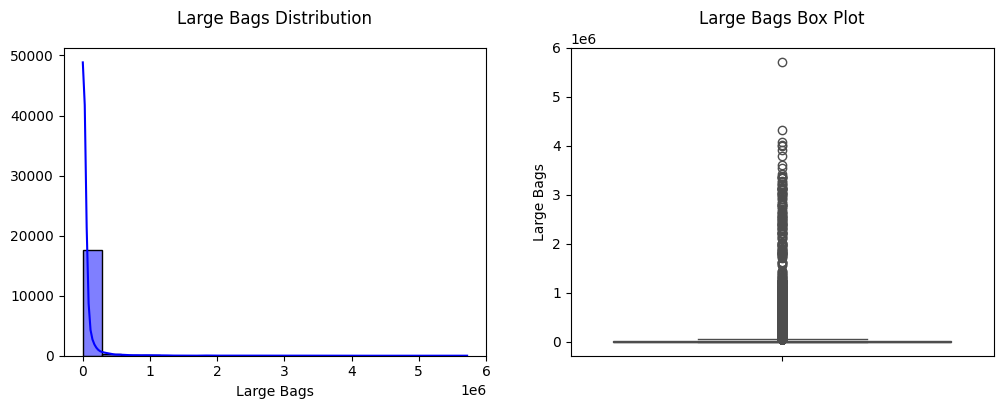

Skewness of Large Bags: 9.796454598705258


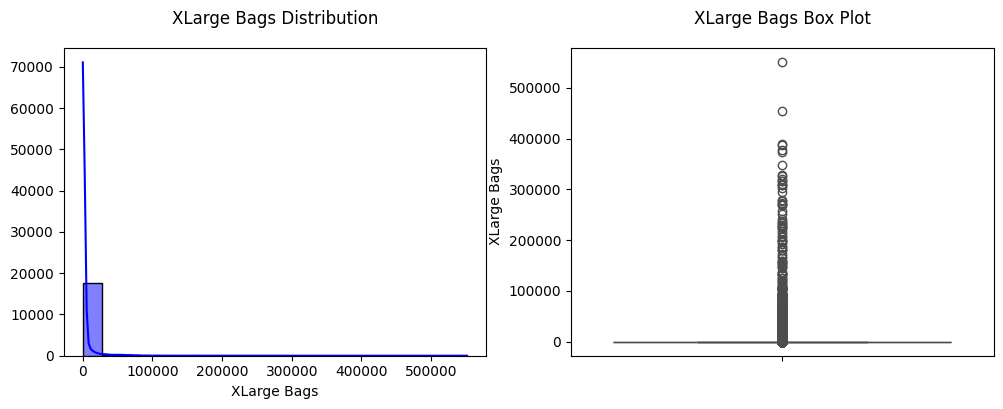

Skewness of XLarge Bags: 13.13975068600658


In [28]:
for col in num_col:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot histogram with KDE
    sns.histplot(df[col], kde=True, bins=20, ax=axes[0], color='blue')
    sns.boxplot(df[col], ax=axes[1], color='blue')

    # Set titles
    axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
    axes[0].set_ylabel('', size=10, labelpad=8)
    axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

    plt.show()

    # Show the skewness of the column
    print(f"Skewness of {col}: {df[col].skew()}")

Almost all the features are right skewed and there are outlier present in the boxpllot

## Bivariate analysis

In [29]:
# Select numeric columns
#numeric_columns = df.select_dtypes(include='number').columns

# Calculate the mean of numeric columns grouped by 'Date'
price_by_date = df.groupby('Date')[num_col].mean()['AveragePrice']

# Display the result
price_by_date

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64

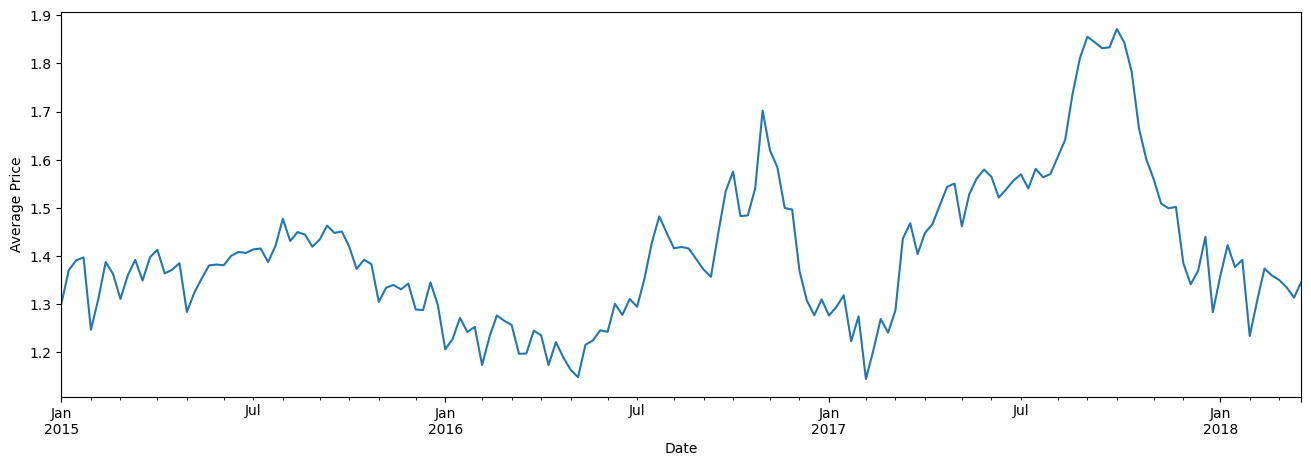

In [30]:
plt.figure(figsize=(16,5))

# Plot the average price over the time
price_by_date.plot()
plt.ylabel('Average Price');

In [31]:
# Create the pivot table
price_by_date_type_t = df.pivot_table(index='Date', columns='type', values='AveragePrice', aggfunc='mean')
display(price_by_date_type_t)

type        conventional   organic
Date                              
2015-01-04      1.009630  1.592963
2015-01-11      1.111296  1.630000
2015-01-18      1.133519  1.648704
2015-01-25      1.115370  1.678889
2015-02-01      0.962037  1.532037
...                  ...       ...
2018-02-25      1.141111  1.578148
2018-03-04      1.142407  1.557963
2018-03-11      1.136667  1.533519
2018-03-18      1.096296  1.531111
2018-03-25      1.147222  1.546481

[169 rows x 2 columns]

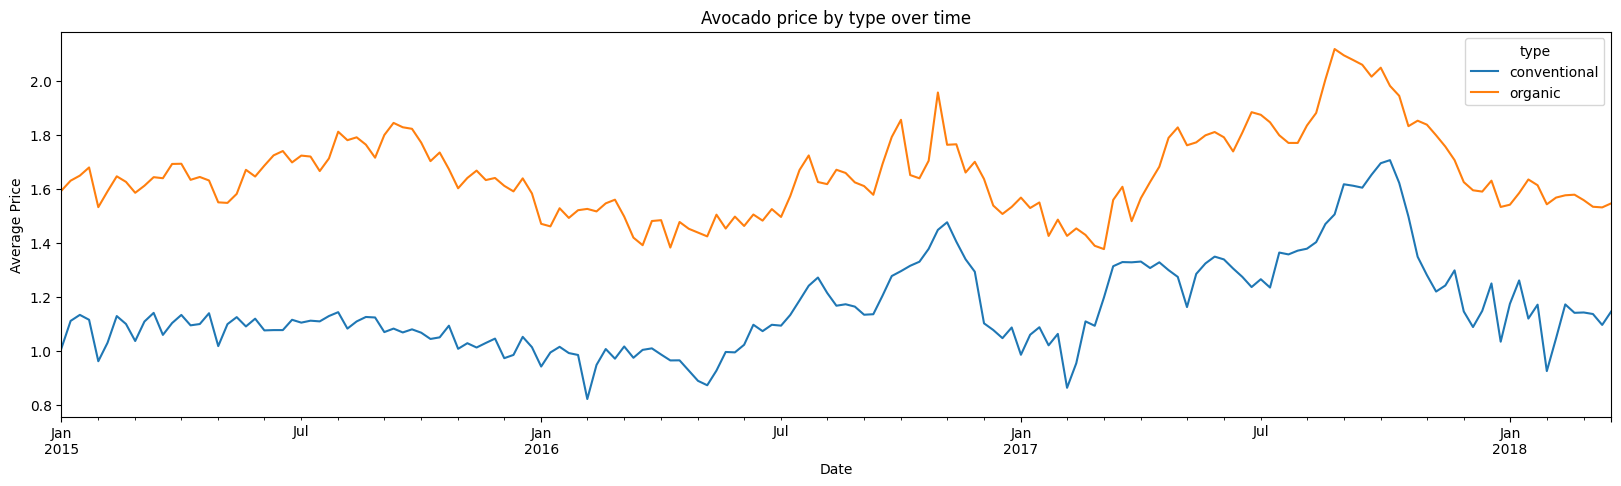

In [32]:
# Plot the Average Price of different types of avocado over time
price_by_date_type_t.plot(figsize=(20,5))
plt.ylabel('Average Price')
plt.title('Avocado price by type over time')
plt.show()

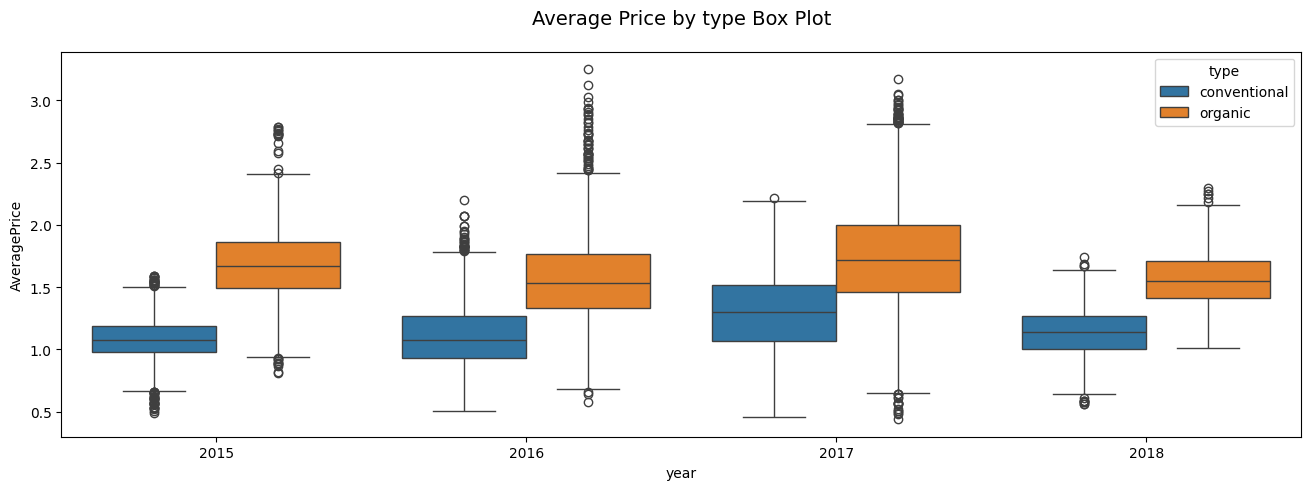

In [33]:
plt.figure(figsize=(16,5))

sns.boxplot(x='year', y='AveragePrice', hue='type', data= df )

plt.title('Average Price by type Box Plot', size=14, y=1.05)
plt.show()

There are outliers in every year and type. In 2017 the organic type had a better price. In general, the organic type has a better price every year.

In [34]:

df_by_year_type = df.groupby(['year','type'], as_index=False).agg({'AveragePrice':'mean', 
                                                'Total Volume':'sum', 
                                                'Total Bags':'sum', 
                                                'Small Bags': 'sum',
                                                'Large Bags': 'sum',
                                                'XLarge Bags': 'sum'})
df_by_year_type

year          type  AveragePrice  Total Volume    Total Bags    Small Bags  \
0  2015  conventional      1.077963  4.296599e+09  7.481009e+08  6.194886e+08   
1  2015       organic      1.673324  8.886943e+07  2.409134e+07  1.519414e+07   
2  2016  conventional      1.105595  4.690250e+09  1.398101e+09  1.064426e+09   
3  2016       organic      1.571684  1.306401e+08  6.505765e+07  4.206845e+07   
4  2017  conventional      1.294888  4.766166e+09  1.541193e+09  1.145835e+09   
5  2017       organic      1.735521  1.681399e+08  1.050962e+08  7.711715e+07   
6  2018  conventional      1.127886  1.334206e+09  4.593696e+08  3.344334e+08   
7  2018       organic      1.567176  4.853227e+07  3.216630e+07  2.630799e+07   

     Large Bags  XLarge Bags  
0  1.231692e+08   5443128.28  
1  8.897192e+06         0.00  
2  3.136371e+08  20038284.84  
3  2.298920e+07         0.00  
4  3.713655e+08  23991658.41  
5  2.797352e+07      5513.93  
6  1.177311e+08   7205184.07  
7  5.852903e+06      5407.80

we can observe the organic xlarge bags had no sales in 2015 and 16 and it began in 2017

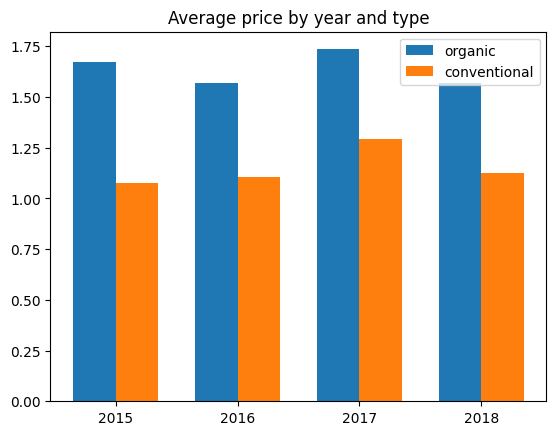

In [35]:
years = df['year'].unique()
n_years = np.arange(df['year'].nunique())
bar_width = 0.35
organic_by_year = df_by_year_type[df_by_year_type['type'] == 'organic']['AveragePrice']
conventional_by_year = df_by_year_type[df_by_year_type['type'] == 'conventional']['AveragePrice']

plt.bar( n_years, organic_by_year , bar_width, label = 'organic')
plt.bar( n_years + bar_width , conventional_by_year, bar_width, label = 'conventional')
plt.xticks( n_years + bar_width/2, years)
plt.title('Average price by year and type')
plt.legend()
plt.show()

## Average Price in Each Region

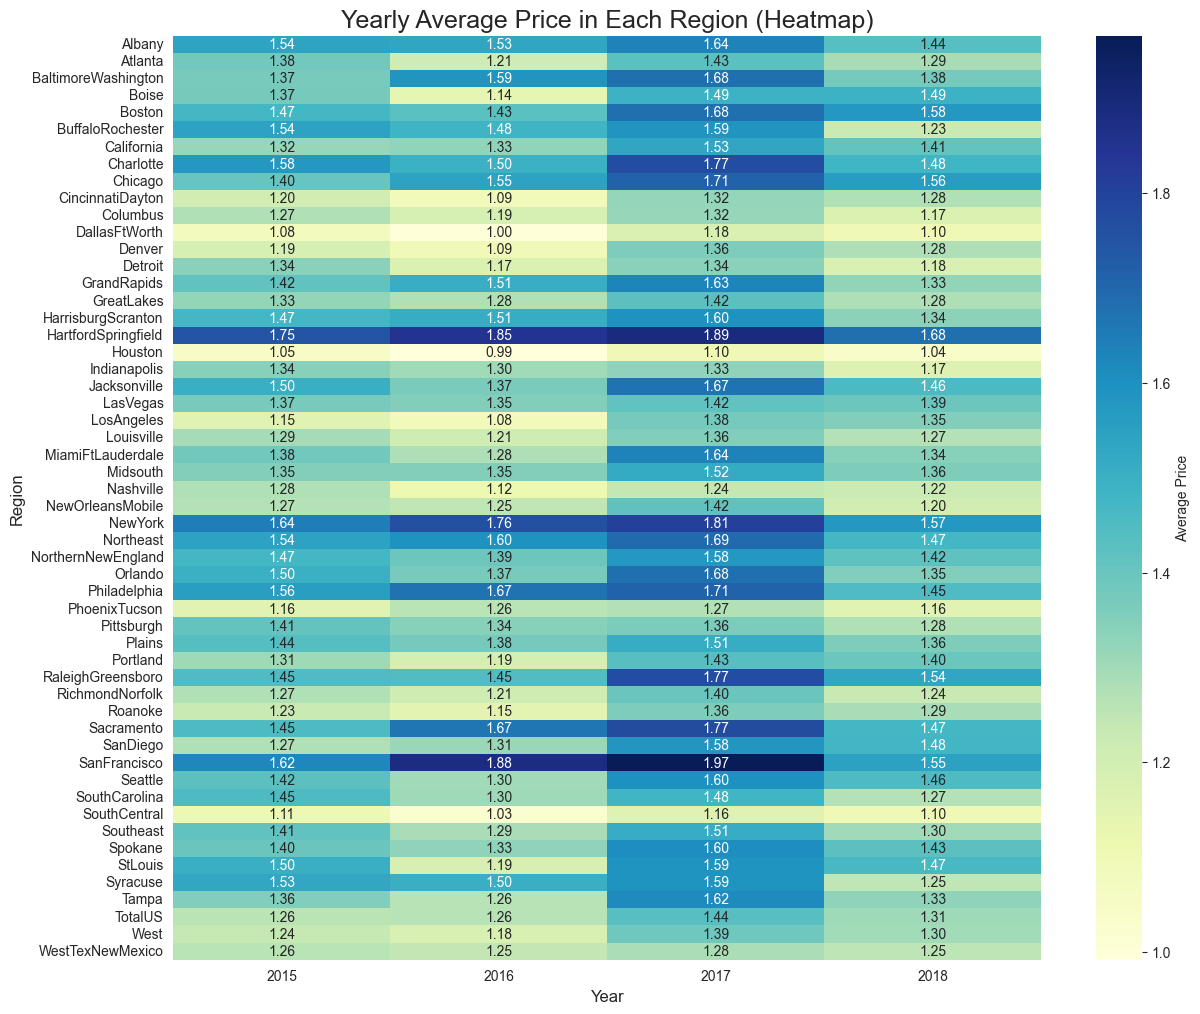

In [36]:
pivot_df = df.pivot_table(index='region', columns='year', values='AveragePrice', aggfunc='mean')

plt.figure(figsize=(14, 12))
sns.set_palette('Set2')
sns.set_style('whitegrid')

sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Average Price'})

plt.xlabel('Year', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.title('Yearly Average Price in Each Region (Heatmap)', fontsize=18)
plt.show()


## Average price distribution based on region

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

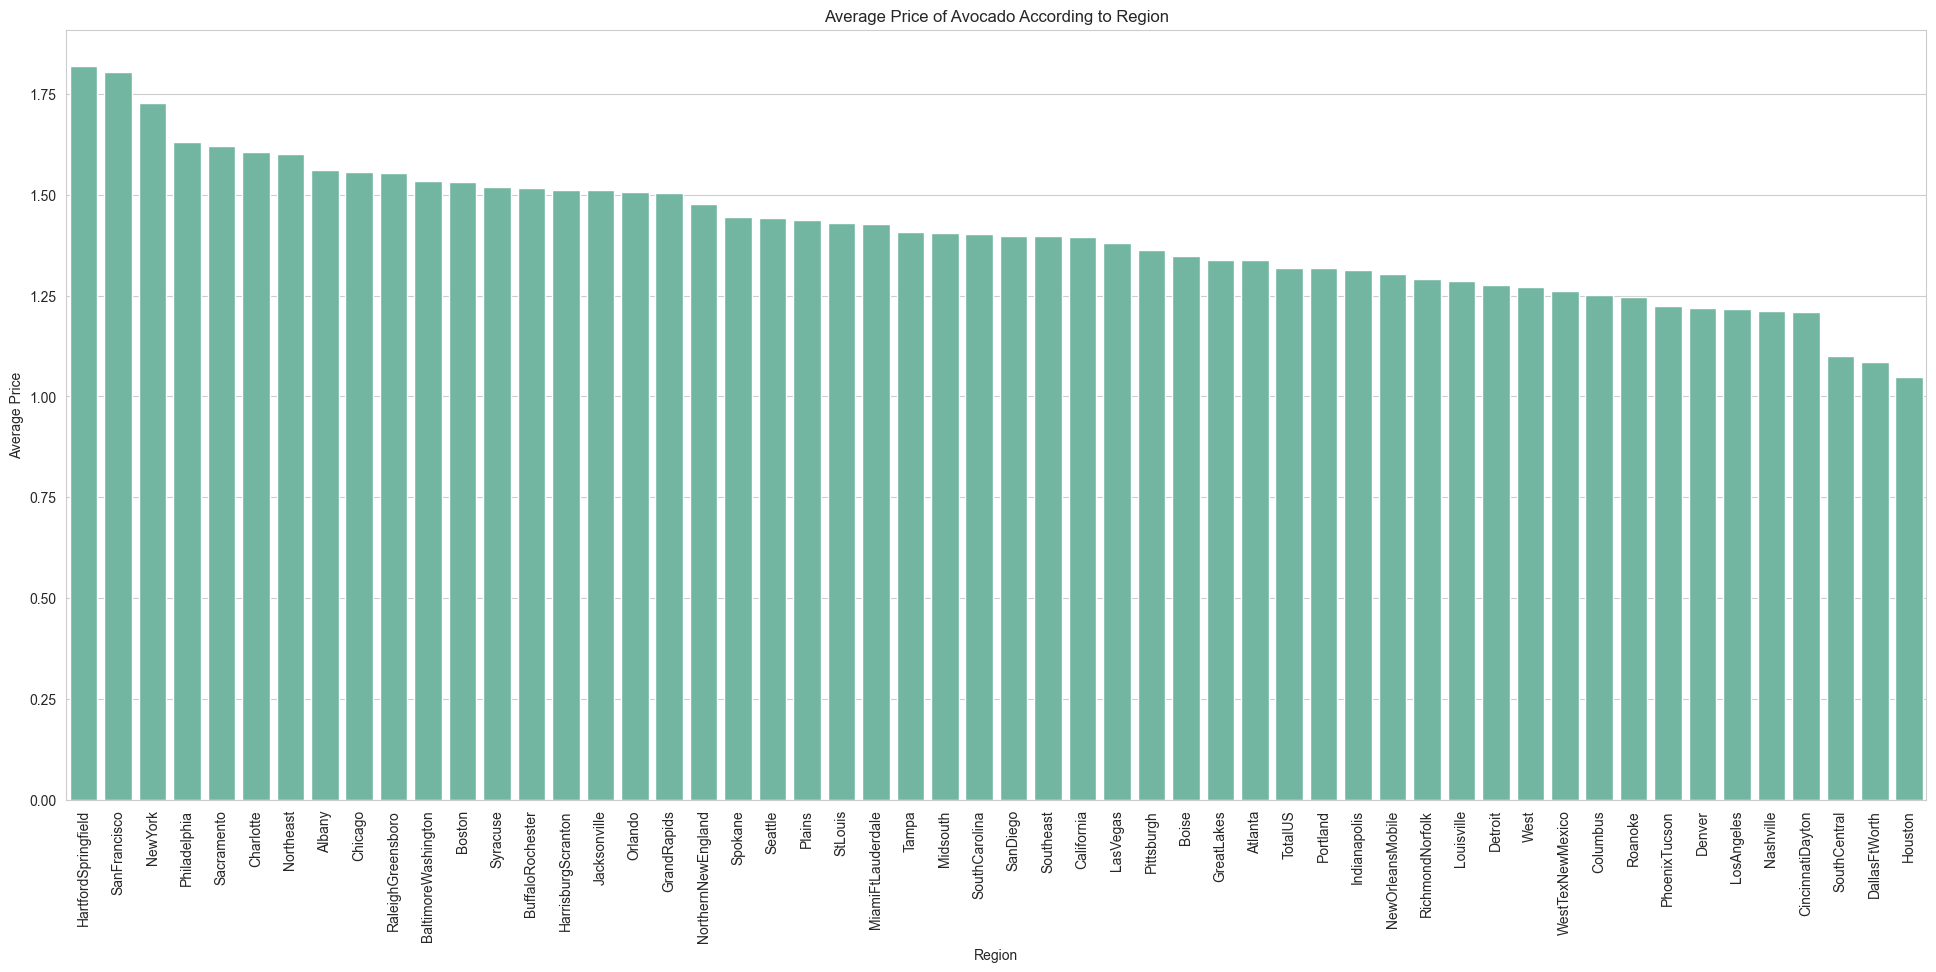

In [37]:
df_temp = df.groupby('region', as_index=False).agg({'AveragePrice': 'mean'})
df_temp = df_temp.sort_values(by='AveragePrice', ascending=False)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=df_temp.region,y=df_temp.AveragePrice)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

In [38]:
df_temp.head(10)

region  AveragePrice
17  HartfordSpringfield      1.818639
42         SanFrancisco      1.804201
28              NewYork      1.727574
32         Philadelphia      1.632130
40           Sacramento      1.621568
7             Charlotte      1.606036
29            Northeast      1.601923
0                Albany      1.561036
8               Chicago      1.556775
37    RaleighGreensboro      1.555118

These are the top 10 places with highest avg price

## Average of Total Volume by Region

In [39]:

# Group by region
df_by_region = df.groupby(['region'], as_index=False).agg({'Total Volume':'mean'})

# Drop the total
df_by_region = df_by_region[df_by_region['region']!='TotalUS']

# sort by total volumen 
df_by_region = df_by_region.sort_values('Total Volume', ascending=False)

display(df_by_region.head())
display(df_by_region.tail())

region  Total Volume
52          West  3.215323e+06
6     California  3.044324e+06
45  SouthCentral  2.991952e+06
29     Northeast  2.110299e+06
46     Southeast  1.820232e+06

region  Total Volume
23  Louisville  47624.267456
0       Albany  47537.869734
47     Spokane  46051.110888
3        Boise  42642.567308
49    Syracuse  32374.756450

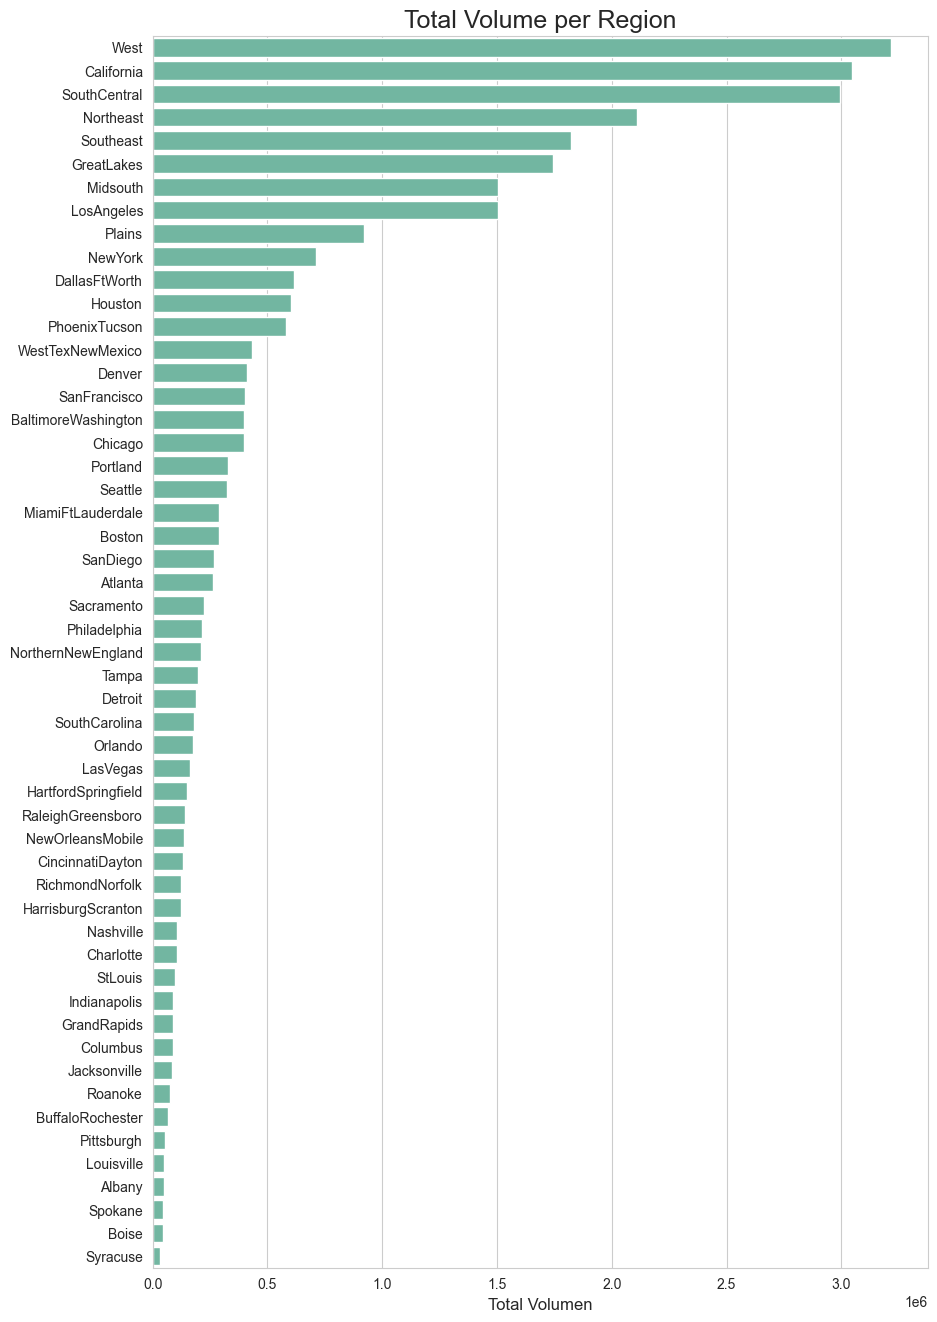

In [40]:
plt.figure(figsize=(10,16))
sns.set_palette('Set2')
sns.set_style('whitegrid')

sns.barplot(y='region', x='Total Volume', data=df_by_region)

plt.xlabel('Total Volumen', {'fontsize' : 12})
plt.ylabel('', {'fontsize':12})
plt.title("Total Volume per Region", size=18, y=1);

## Multivariate analysis

### Pairplot

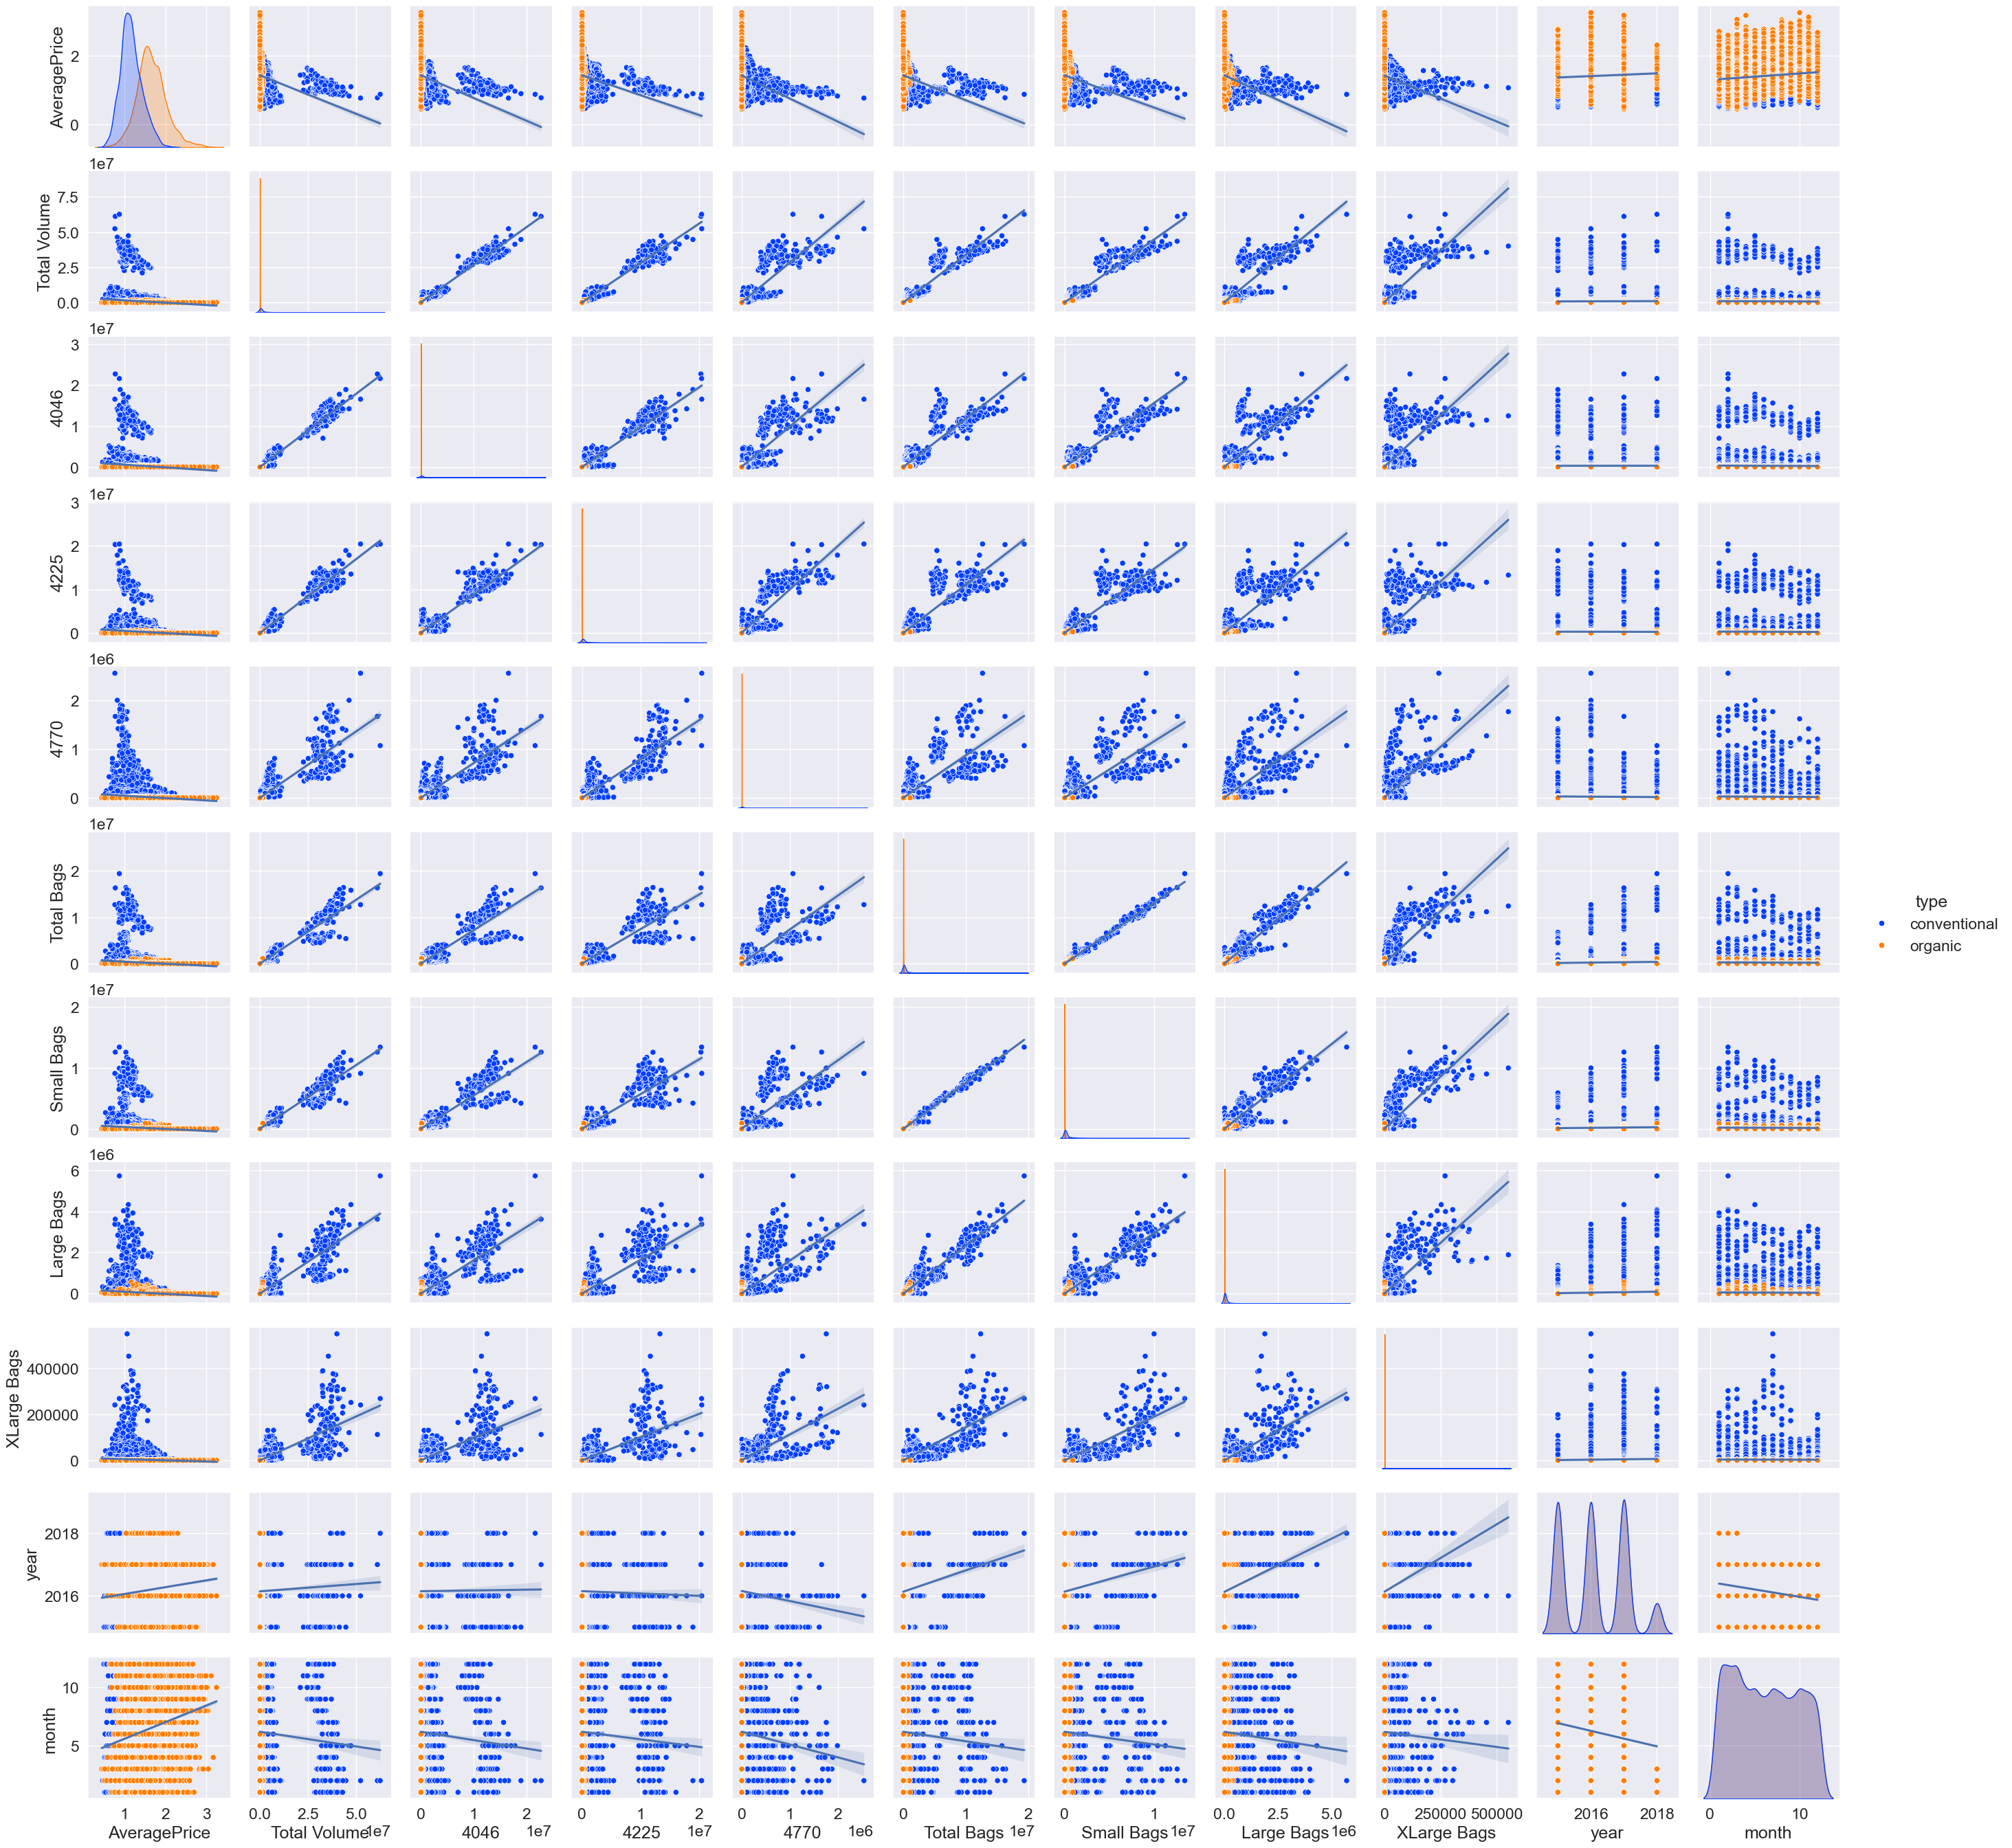

In [41]:
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, hue='type', palette = "bright")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

We can see the target column average price has negative relationship with all other features

## Encoding categorical columns

In [42]:
df['type'] = df['type'].map({'conventional': 0, 'organic': 1})
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  month  
0     8696.87     8603.62       93.25          0.0     0  2015  Albany     12  
1     9505.56     9408.07       97.49          0.0     0  2015  Albany     12  
2     8145.35     8042.21      103.14          0.0     0  2015  Albany     12  
3     5811.16     5677.40      133.76          0.0     0  2015  Albany     12  
4     6183.95     5986.26      197.69          0.0     0  2015  Albany     11

In [43]:
# Encoding categorical column region using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

# Fit and transform the 'region' column
df['region_encoded'] = OE.fit_transform(df['region'].values.reshape(-1, 1))

display(df.head())
display(df.tail())

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  month  \
0     8696.87     8603.62       93.25          0.0     0  2015  Albany     12   
1     9505.56     9408.07       97.49          0.0     0  2015  Albany     12   
2     8145.35     8042.21      103.14          0.0     0  2015  Albany     12   
3     5811.16     5677.40      133.76          0.0     0  2015  Albany     12   
4     6183.95     5986.26      197.69          0.0     0  2015  Albany     11   

   region_encoded  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

Date  AveragePrice  Total Volume     4046     4225    4770  \
18244 2018-02-04          1.63      17074.83  2046.96  1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70  3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92  2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63  2981.04  727.01   
18248 2018-01-07          1.62      17489.58  2894.77  2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  \
18244    13498.67    13066.82      431.85          0.0     1  2018   
18245     9264.84     8940.04      324.80          0.0     1  2018   
18246     9394.11     9351.80       42.31          0.0     1  2018   
18247    10969.54    10919.54       50.00          0.0     1  2018   
18248    12014.15    11988.14       26.01          0.0     1  2018   

                 region  month  region_encoded  
18244  WestTexNewMexico      2            53.0  
18245  WestTexNewMexico      1            53.0  
18246  WestTexNewMexico      1            53.0  
18247  WestTexNewMexico      1            53.0  
18248  WestTexNewMexico      1            53.0

In [44]:
# Store the category mappings 
category_mappings = {'region': OE.categories_[0].tolist() }

In [45]:
category_mappings

{'region': ['Albany',
  'Atlanta',
  'BaltimoreWashington',
  'Boise',
  'Boston',
  'BuffaloRochester',
  'California',
  'Charlotte',
  'Chicago',
  'CincinnatiDayton',
  'Columbus',
  'DallasFtWorth',
  'Denver',
  'Detroit',
  'GrandRapids',
  'GreatLakes',
  'HarrisburgScranton',
  'HartfordSpringfield',
  'Houston',
  'Indianapolis',
  'Jacksonville',
  'LasVegas',
  'LosAngeles',
  'Louisville',
  'MiamiFtLauderdale',
  'Midsouth',
  'Nashville',
  'NewOrleansMobile',
  'NewYork',
  'Northeast',
  'NorthernNewEngland',
  'Orlando',
  'Philadelphia',
  'PhoenixTucson',
  'Pittsburgh',
  'Plains',
  'Portland',
  'RaleighGreensboro',
  'RichmondNorfolk',
  'Roanoke',
  'Sacramento',
  'SanDiego',
  'SanFrancisco',
  'Seattle',
  'SouthCarolina',
  'SouthCentral',
  'Southeast',
  'Spokane',
  'StLouis',
  'Syracuse',
  'Tampa',
  'TotalUS',
  'West',
  'WestTexNewMexico']}

## Now we can drop the unwanted columns i.e. Date and Region

In [46]:
df.drop(columns=['Date', 'region'], inplace=True)

In [47]:
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  month  region_encoded  
0         8603.62       93.25          0.0     0  2015     12             0.0  
1         9408.07       97.49          0.0     0  2015     12             0.0  
2         8042.21      103.14          0.0     0  2015     12             0.0  
3         5677.40      133.76          0.0     0  2015     12             0.0  
4         5986.26      197.69          0.0     0  2015     11             0.0  
...           ...         ...          ...   ...   ...    ...             ...  
18244    13066.82      431.85          0.0     1  2018      2            53.0  
18245     8940.04      324.80          0.0     1  2018      1            53.0  
18246     9351.80       42.31          0.0     1  2018      1            53.0  
18247    10919.54       50.00          0.0     1  2018      1            53.0  
18248    11988.14       26.01          0.0     1  2018      1            53.0  

[18249 rows x 13 columns]

## Correlation

In [48]:
# Correlation between features
cor = df.corr()
cor

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice        1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume       -0.192752      1.000000  0.977863  0.974181  0.872202   
4046               -0.208317      0.977863  1.000000  0.926110  0.833389   
4225               -0.172928      0.974181  0.926110  1.000000  0.887855   
4770               -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags         -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags         -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags         -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags        -0.117592      0.747157  0.699377  0.688809  0.679861   
type                0.615845     -0.232434 -0.225819 -0.232289 -0.210027   
year                0.093197      0.017193  0.003353 -0.009559 -0.036531   
month               0.162409     -0.024689 -0.025803 -0.022108 -0.033424   
region_encoded     -0.011716      0.174176  0.192073  0.145726  0.095252   

                Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice     -0.177088   -0.174730   -0.172940    -0.117592  0.615845   
Total Volume      0.963047    0.967238    0.880640     0.747157 -0.232434   
4046              0.920057    0.925280    0.838645     0.699377 -0.225819   
4225              0.905787    0.916031    0.810015     0.688809 -0.232289   
4770              0.792314    0.802733    0.698471     0.679861 -0.210027   
Total Bags        1.000000    0.994335    0.943009     0.804233 -0.217788   
Small Bags        0.994335    1.000000    0.902589     0.806845 -0.220535   
Large Bags        0.943009    0.902589    1.000000     0.710858 -0.193177   
XLarge Bags       0.804233    0.806845    0.710858     1.000000 -0.175483   
type             -0.217788   -0.220535   -0.193177    -0.175483  1.000000   
year              0.071552    0.063915    0.087891     0.081033 -0.000032   
month            -0.022724   -0.023126   -0.020187    -0.012969 -0.000085   
region_encoded    0.175256    0.164702    0.198768     0.082281 -0.000280   

                    year     month  region_encoded  
AveragePrice    0.093197  0.162409       -0.011716  
Total Volume    0.017193 -0.024689        0.174176  
4046            0.003353 -0.025803        0.192073  
4225           -0.009559 -0.022108        0.145726  
4770           -0.036531 -0.033424        0.095252  
Total Bags      0.071552 -0.022724        0.175256  
Small Bags      0.063915 -0.023126        0.164702  
Large Bags      0.087891 -0.020187        0.198768  
XLarge Bags     0.081033 -0.012969        0.082281  
type           -0.000032 -0.000085       -0.000280  
year            1.000000 -0.177050       -0.000055  
month          -0.177050  1.000000       -0.000144  
region_encoded -0.000055 -0.000144        1.000000

In [49]:
# Listing the correlation coeficients with the target variable AveragePrice
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'AveragePrice')]

Feature A       Feature B  Corr coef
0    AveragePrice    AveragePrice   1.000000
69   AveragePrice            type   0.615845
82   AveragePrice           month   0.162409
87   AveragePrice            year   0.093197
115  AveragePrice  region_encoded  -0.011716
136  AveragePrice     XLarge Bags  -0.117592
138  AveragePrice            4225  -0.172928
140  AveragePrice      Large Bags  -0.172940
142  AveragePrice      Small Bags  -0.174730
148  AveragePrice      Total Bags  -0.177088
150  AveragePrice            4770  -0.179446
151  AveragePrice    Total Volume  -0.192752
155  AveragePrice            4046  -0.208317

In [50]:
# Listing the correlation coeficients with the target variable AveragePrice
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'region_encoded')]

Feature A       Feature B  Corr coef
12   region_encoded  region_encoded   1.000000
71   region_encoded      Large Bags   0.198768
73   region_encoded            4046   0.192073
75   region_encoded      Total Bags   0.175256
77   region_encoded    Total Volume   0.174176
79   region_encoded      Small Bags   0.164702
84   region_encoded            4225   0.145726
85   region_encoded            4770   0.095252
92   region_encoded     XLarge Bags   0.082281
106  region_encoded            year  -0.000055
109  region_encoded           month  -0.000144
112  region_encoded            type  -0.000280
116  region_encoded    AveragePrice  -0.011716

## Obseravtion:

Average price: There is a weak positive relationship between Average price and month, year

Region: weak positive relatioinship between target and features except year, month, type, average price

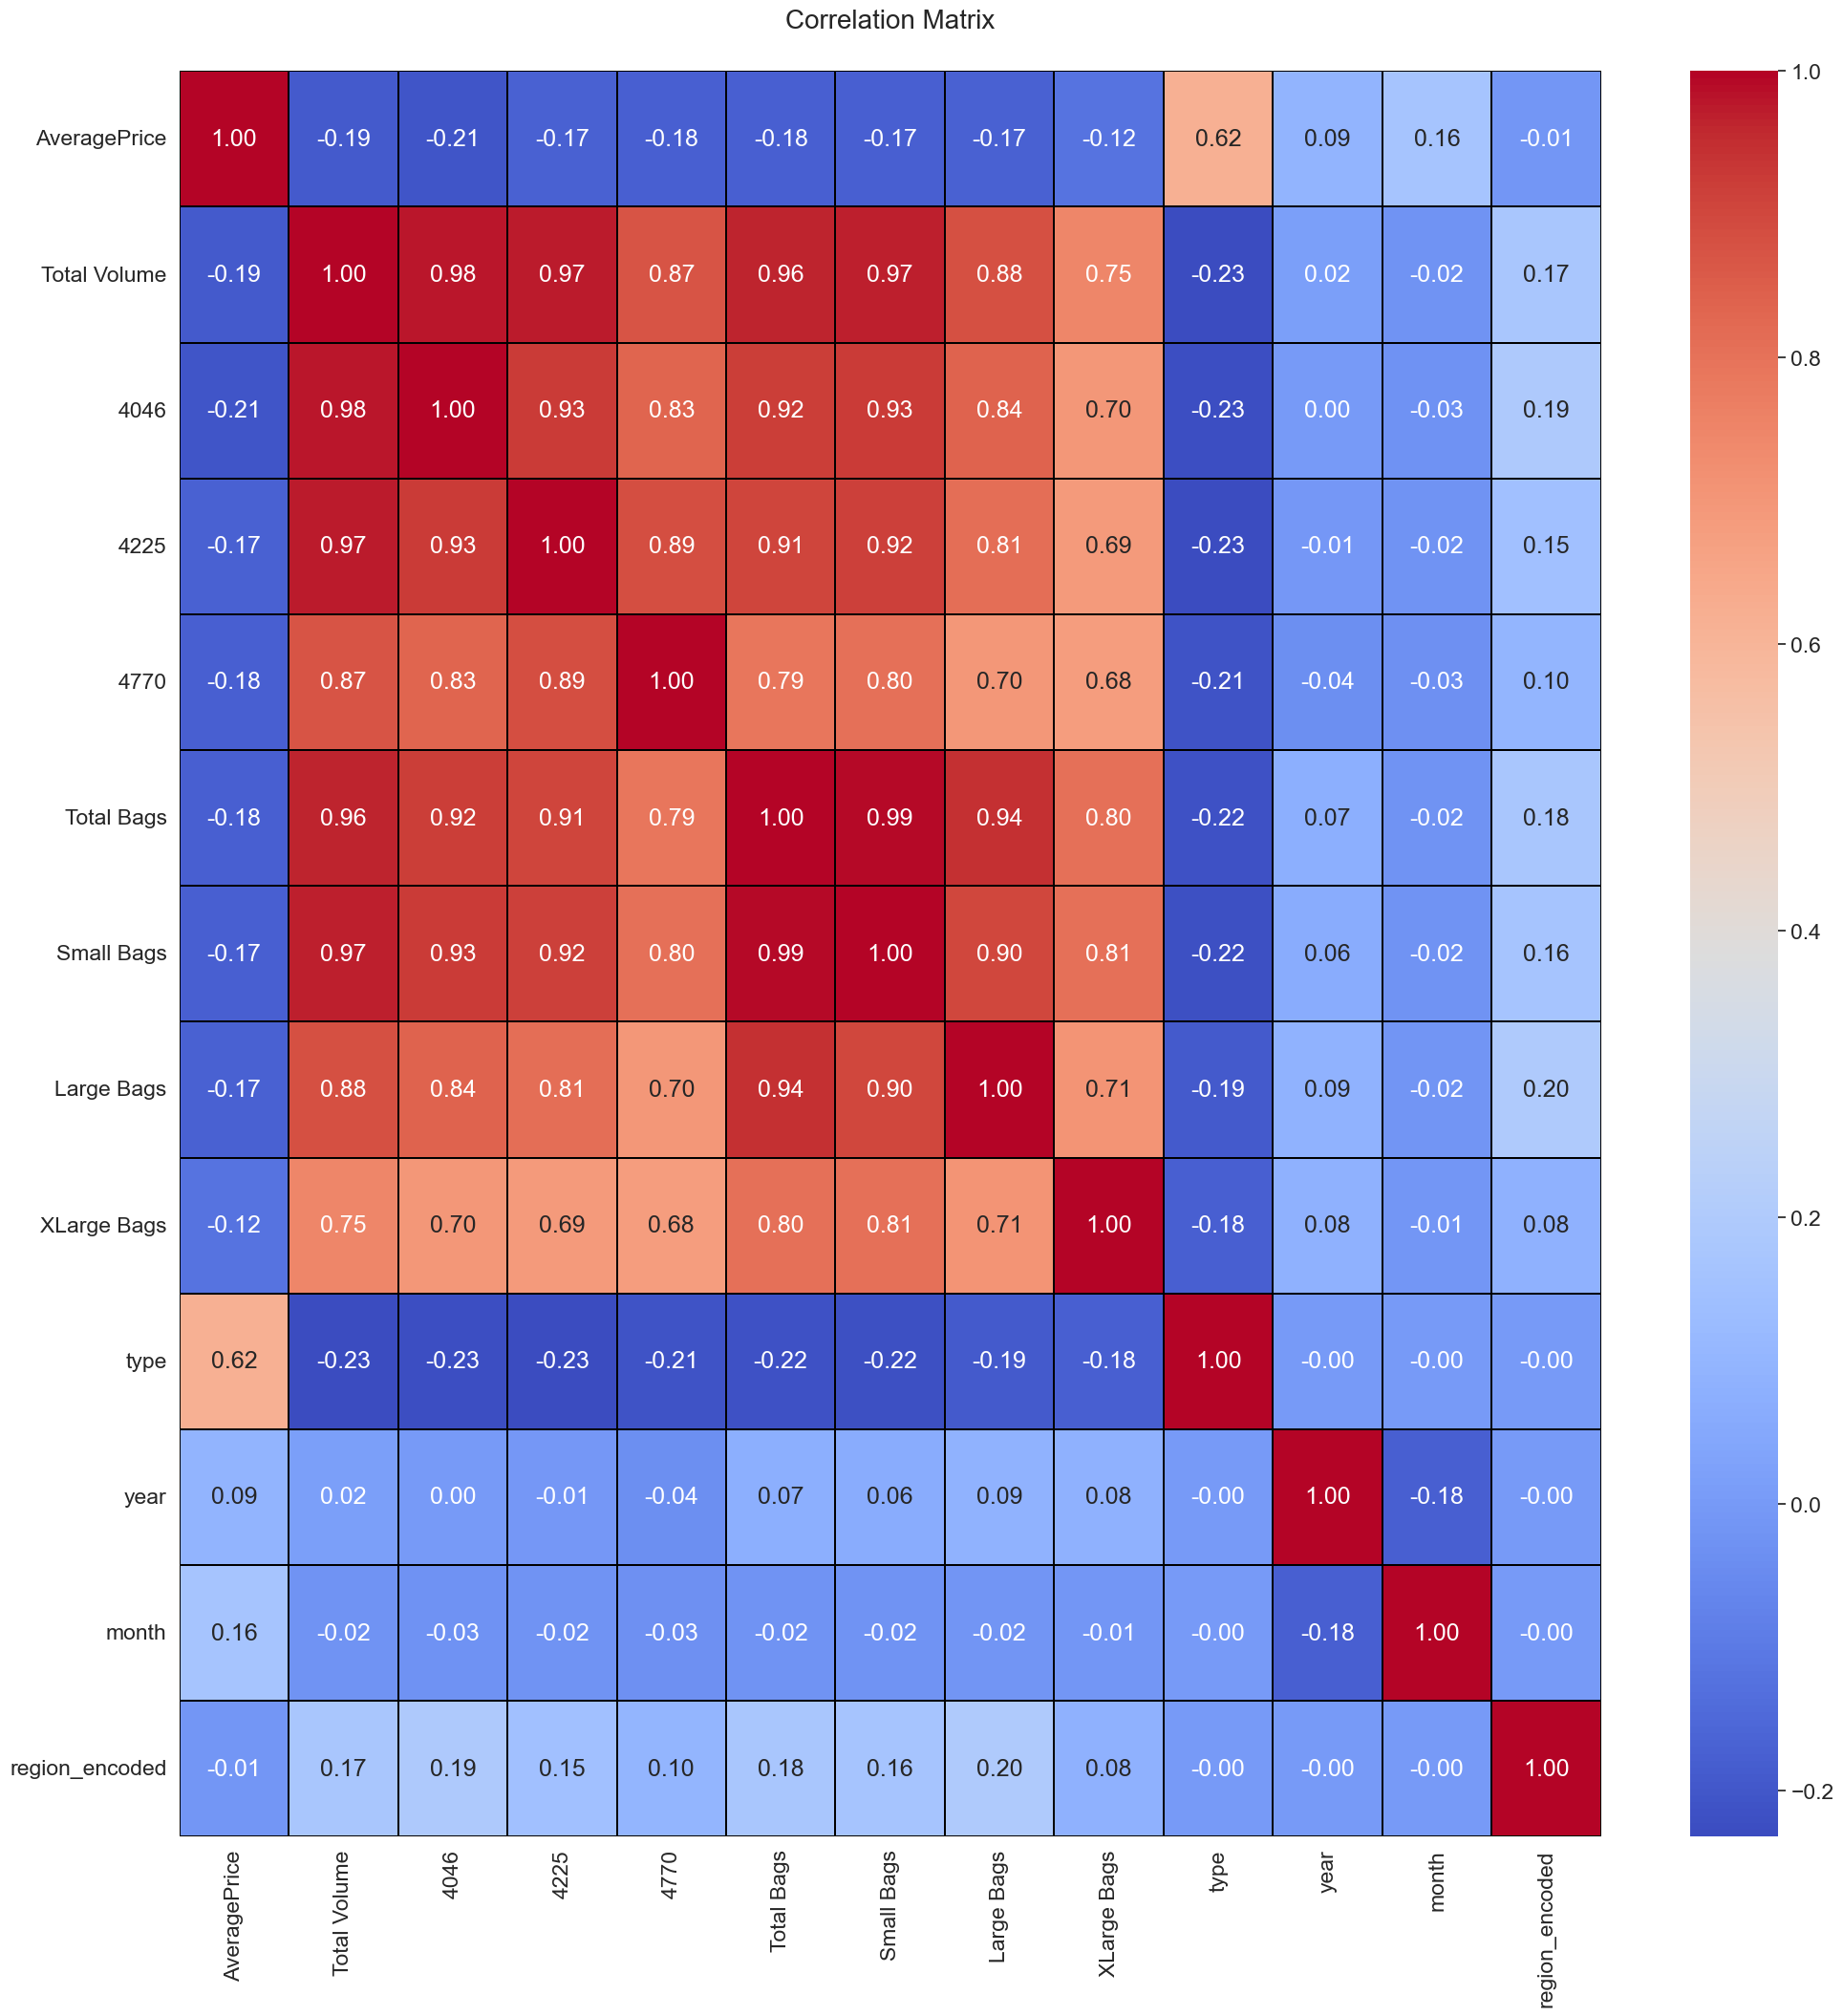

In [51]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(24, 24))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='coolwarm', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix', size=20, y=1.02)
plt.show()

## Observation:

The column total volume has high correlation with columns 4046, 4225, 4770, total bags, small bags, large bags, xlarge bags

The average price has more positive correlation with type feature and negative correlation with 4046

The region is slightly correlated negatively with Large bags

# 2. Preprocessing Data

## 2.1 Missing values

In [52]:
df.isnull().sum().sum()

0

## 2.2 Removing outliers

In [53]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.188689      0.227716  0.230816  0.199902  0.212091    0.234170   
1          0.139020      0.230427  0.231103  0.208054  0.211997    0.233350   
2          1.182069      0.212085  0.231007  0.154478  0.211325    0.234730   
3          0.809551      0.223444  0.230741  0.185350  0.211864    0.237096   
4          0.312861      0.231538  0.230891  0.208719  0.211834    0.236718   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347      0.241373  0.230017  0.243857  0.212540    0.229301   
18245      0.755023      0.242296  0.230693  0.242277  0.212540    0.233594   
18246      1.152375      0.242331  0.230693  0.243090  0.205766    0.233463   
18247      1.301382      0.241625  0.230428  0.242651  0.205774    0.231866   
18248      0.531512      0.241253  0.229347  0.243170  0.210450    0.230807   

       Small Bags  Large Bags  XLarge Bags      type      year     month  \
0        0.232647    0.222352      0.17558  0.999836  1.221282  1.647632   
1        0.231568    0.222335      0.17558  0.999836  1.221282  1.647632   
2        0.233399    0.222311      0.17558  0.999836  1.221282  1.647632   
3        0.236568    0.222186      0.17558  0.999836  1.221282  1.647632   
4        0.236154    0.221924      0.17558  0.999836  1.221282  1.364669   
...           ...         ...          ...       ...       ...       ...   
18244    0.226665    0.220964      0.17558  1.000164  1.970504  1.181997   
18245    0.232196    0.221403      0.17558  1.000164  1.970504  1.464959   
18246    0.231644    0.222561      0.17558  1.000164  1.970504  1.464959   
18247    0.229543    0.222529      0.17558  1.000164  1.970504  1.464959   
18248    0.228111    0.222628      0.17558  1.000164  1.970504  1.464959   

       region_encoded  
0            1.700252  
1            1.700252  
2            1.700252  
3            1.700252  
4            1.700252  
...               ...  
18244        1.700811  
18245        1.700811  
18246        1.700811  
18247        1.700811  
18248        1.700811  

[18249 rows x 13 columns]

In [54]:
# threshold = 3
df_new = df[(z<3).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()
df

598 rows with outliers were deleted.
This represent 3.28% of the data.
In the new dataset there are 17651 rows and 13 columns.


AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  month  region_encoded  
0         8603.62       93.25          0.0     0  2015     12             0.0  
1         9408.07       97.49          0.0     0  2015     12             0.0  
2         8042.21      103.14          0.0     0  2015     12             0.0  
3         5677.40      133.76          0.0     0  2015     12             0.0  
4         5986.26      197.69          0.0     0  2015     11             0.0  
...           ...         ...          ...   ...   ...    ...             ...  
18244    13066.82      431.85          0.0     1  2018      2            53.0  
18245     8940.04      324.80          0.0     1  2018      1            53.0  
18246     9351.80       42.31          0.0     1  2018      1            53.0  
18247    10919.54       50.00          0.0     1  2018      1            53.0  
18248    11988.14       26.01          0.0     1  2018      1            53.0  

[17651 rows x 13 columns]

## 2.3 Skewness check

In [55]:
# Checking the skewness in the data
df_skew = df.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

Skew
XLarge Bags     6.135607
4770            5.117170
Large Bags      5.053434
4046            4.909848
4225            4.455745
Small Bags      4.222706
Total Bags      4.066771
Total Volume    3.767138
AveragePrice    0.377432
year            0.229976
month           0.107408
region_encoded  0.012798
type           -0.037741

We will select the colummns where skewness is more than 0.5 and remove the skewness by applying transformation methods

In [56]:
skewed_columns = df_skew[df_skew['Skew'] > 0.5].index.to_list()
skewed_columns = sorted(skewed_columns)
skewed_columns

['4046',
 '4225',
 '4770',
 'Large Bags',
 'Small Bags',
 'Total Bags',
 'Total Volume',
 'XLarge Bags']

We will try transformation methods like cuberoot, square root, and log transformation method and findout which works the best

In [57]:
#Create a df to store the values
df_transformed = pd.DataFrame()

for col in skewed_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df[col])
    df_transformed[f"{col}_log"] = np.log(df[col])
    
# Adding the other columns
df_transformed = pd.concat([df_transformed, df[skewed_columns]], axis=1)

In [58]:
# Comparing which transform method give better results
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

# Reset the index and identify the feature
df_comp.reset_index(inplace=True)
df_comp['feature'] = df_comp['index'].str.extract(r'^([^_]+|.*)')
df_comp['Skewness_abs'] = abs(df_comp['Skewness'])

# Check the calculated skeweness for PH-121
display(df_comp[df_comp['feature'] == 'TotalBags'] )

# Drop the records with no valid skewness
df_comp = df_comp[~df_comp.Skewness.isnull()]

# Find the indexes of the rows with the minimum 'Skewness_abs' values
min_indices = df_comp.groupby('feature')['Skewness_abs'].idxmin()

# Select the rows corresponding to the minimum values in Skewness_abs,
low_skewness = df_comp.loc[min_indices]
low_skewness

Empty DataFrame
Columns: [index, Skewness, feature, Skewness_abs]
Index: []

index  Skewness       feature  Skewness_abs
30         4046_cbrt  1.555876          4046      1.555876
26         4225_cbrt  1.277025          4225      1.277025
22         4770_cbrt  1.635614          4770      1.635614
18   Large Bags_cbrt  1.276213    Large Bags      1.276213
14   Small Bags_cbrt  1.246033    Small Bags      1.246033
10   Total Bags_cbrt  1.231831    Total Bags      1.231831
5   Total Volume_log -0.050092  Total Volume      0.050092
2   XLarge Bags_cbrt  2.277028   XLarge Bags      2.277028

In [59]:
# Selecting columns to apply cube-root transform method
cbrt_columns = ['4046', '4225', '4770', 'Large Bags', 'Small Bags', 'Total Bags', 'XLarge Bags' ]
print(cbrt_columns)
for col in cbrt_columns:
    df[col] = np.cbrt(df[col])

['4046', '4225', '4770', 'Large Bags', 'Small Bags', 'Total Bags', 'XLarge Bags']


In [60]:
# Transform the Total Volume column
col='Total Volume'
df[col] = np.log(df[col])

In [61]:

# This is the new skewness for the transformed columns
df[skewed_columns].skew()

4046            1.555876
4225            1.277025
4770            1.635614
Large Bags      1.276213
Small Bags      1.246033
Total Bags      1.231831
Total Volume   -0.050092
XLarge Bags     2.277028
dtype: float64

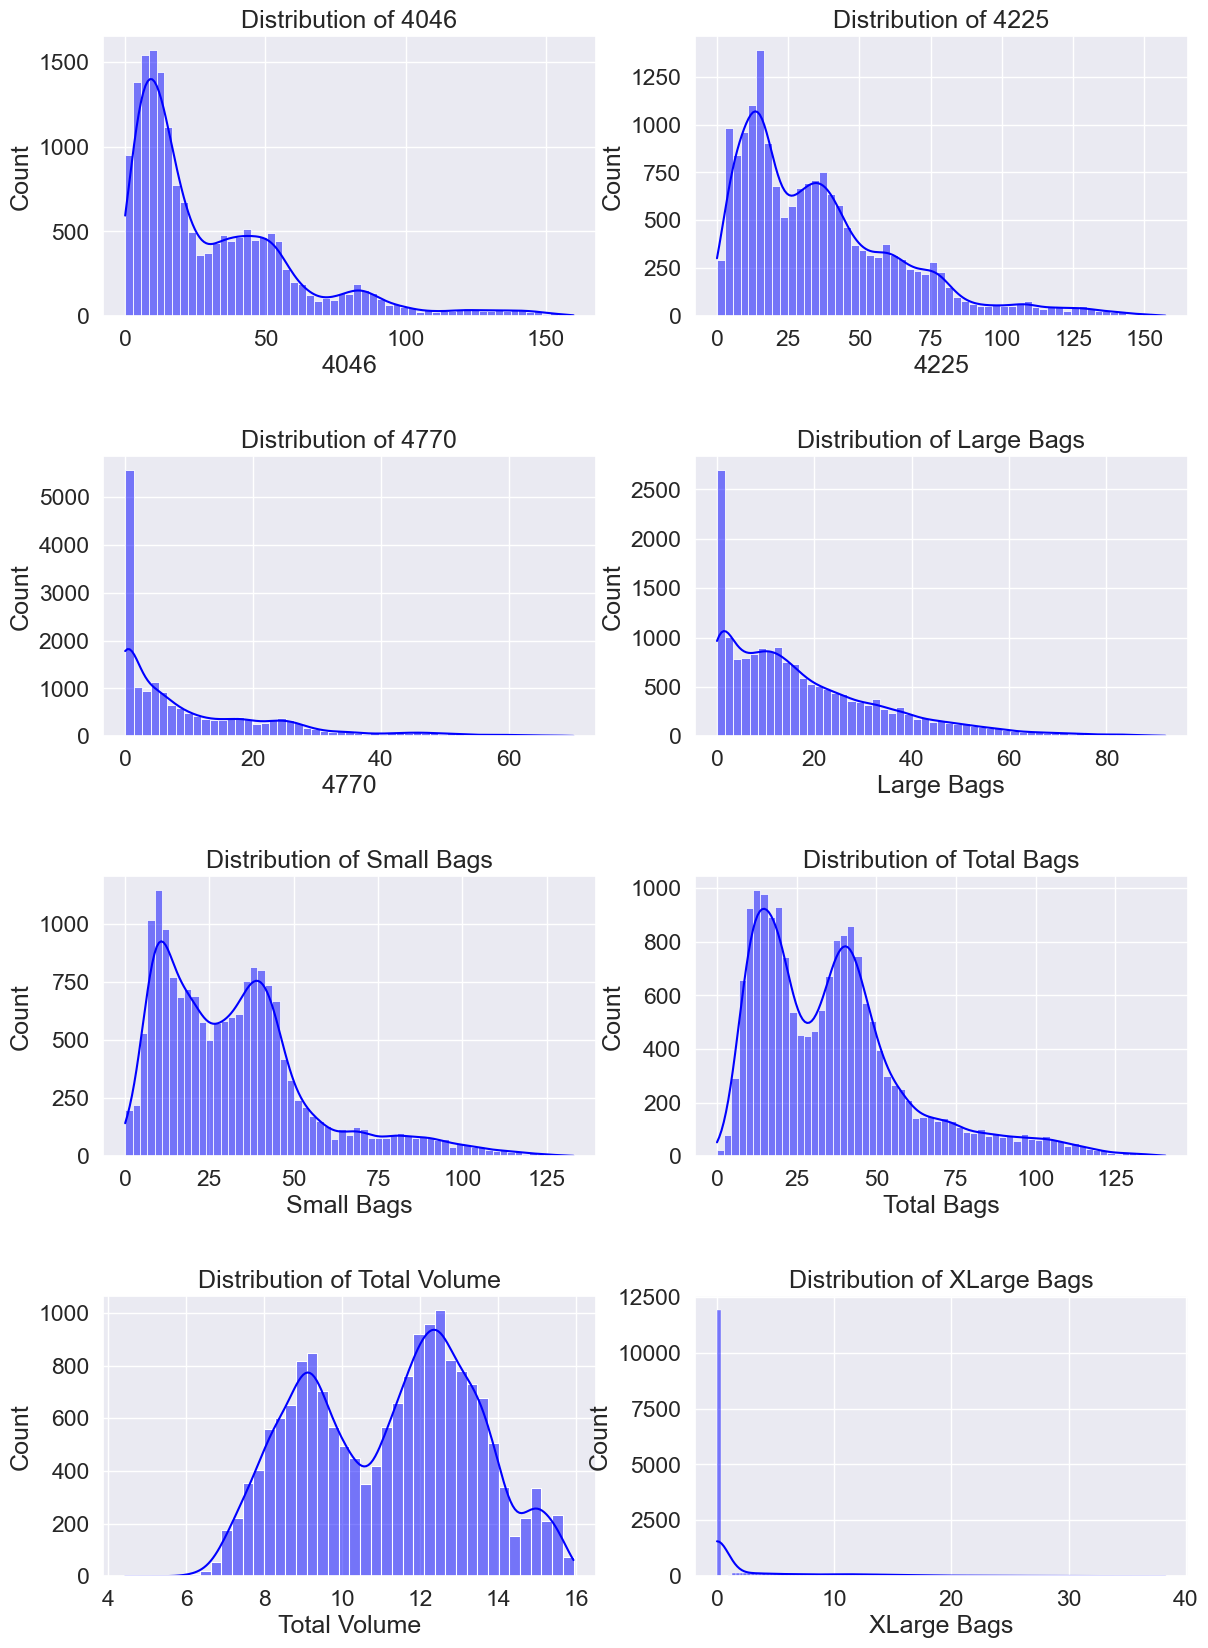

In [62]:
# Visualizing the distribution of the columns after removing skewness
fig, axs = plt.subplots(4, 2, figsize=(14, 20))
for ax, column in zip(axs.flat, skewed_columns):
    sns.histplot(data=df, x=column, ax=ax, kde=True, color='blue')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

# Regression Model

## Feature scaling and Standard scalarisation

### Separating features and labels

In [63]:
# Separating the independent and target variables into x and y 
col = 'AveragePrice'
x = df.drop(col, axis=1)
y = df[col]

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")
print(x.head())
print(y.head())

Feature Dimension = (17651, 12)
Label Dimension = (17651,)
   Total Volume       4046       4225      4770  Total Bags  Small Bags  \
0     11.070329  10.120997  37.903460  3.638275   20.564634   20.490870   
1     10.912849   8.768933  35.473513  3.878204   21.183249   21.110581   
2     11.680304   9.262632  47.790416  5.072283   20.120399   20.035113   
3     11.277104  10.421946  41.597133  4.171309   17.978534   17.839520   
4     10.840357   9.800999  35.260208  4.231732   18.355039   18.157325   

   Large Bags  XLarge Bags  type  year  month  region_encoded  
0    4.534711          0.0     0  2015     12             0.0  
1    4.602425          0.0     0  2015     12             0.0  
2    4.689671          0.0     0  2015     12             0.0  
3    5.114173          0.0     0  2015     12             0.0  
4    5.825433          0.0     0  2015     11             0.0  
0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64


## Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

display(x.head())

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.061926 -0.709648  0.059642 -0.533970   -0.648548   -0.517773   
1     -0.134262 -0.755064 -0.025495 -0.516157   -0.623078   -0.490834   
2      0.218259 -0.738480  0.406050 -0.427502   -0.666838   -0.537584   
3      0.033054 -0.699539  0.189057 -0.494395   -0.755024   -0.633026   
4     -0.167561 -0.720397 -0.032969 -0.489909   -0.739523   -0.619211   

   Large Bags  XLarge Bags      type      year     month  region_encoded  
0   -0.796802     -0.51836 -1.019047 -1.210013  1.644612       -1.695495  
1   -0.792817     -0.51836 -1.019047 -1.210013  1.644612       -1.695495  
2   -0.787683     -0.51836 -1.019047 -1.210013  1.644612       -1.695495  
3   -0.762704     -0.51836 -1.019047 -1.210013  1.644612       -1.695495  
4   -0.720851     -0.51836 -1.019047 -1.210013  1.362113       -1.695495

## Multicollinearity analysis and feature selection

### Checking Variance Inflation Factor (VIF)

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
4       Total Bags  106.755537
5       Small Bags   65.324800
0     Total Volume   11.674529
6       Large Bags    9.213078
2             4225    6.686233
1             4046    4.515508
3             4770    3.285584
8             type    3.259831
7      XLarge Bags    2.065809
9             year    1.406437
11  region_encoded    1.090211
10           month    1.054894

We will drp the column Total bags

In [66]:
x = x.drop(['Total Bags'], axis=1) 

In [67]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
0     Total Volume   10.810069
4       Small Bags    7.237706
2             4225    6.682461
1             4046    4.487115
3             4770    3.285546
7             type    3.186573
5       Large Bags    2.217811
6      XLarge Bags    2.015619
8             year    1.405613
10  region_encoded    1.089755
9            month    1.054886

# 3. Regression Modelling

In [68]:
# Import Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

## Finding the best random state

In [69]:
def get_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Adapt to Regression Models
        acc = r2_score(y_test, y_pred)
#         print(f"{i}: acc = {acc}")
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [70]:
# Build the model
model = LinearRegression()
random_state, acc = get_best_random_state(model, x, y) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.5281 at random_state 106


## Creating train test split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (12355, 11)
x_test shape:   (5296, 11)
y_train shape:  (12355,)
y_test shape:   (5296,)


# Regression Algorithms

In [72]:
# Setting a DataFrame
reg_model = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

## Linear Regression

In [73]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id':'LinearRegression', 'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_scores_df = pd.DataFrame([model_scores])


reg_model = pd.concat([reg_model, model_scores_df], ignore_index=True)

LR coef_        : [-0.1603621  -0.04470204  0.18324227 -0.02558821 -0.00593248 -0.0816512
  0.02274294  0.15621052  0.07146215  0.06793834  0.02153284]

LR intercept_ : 1.4052928413322796
LR score train  : 0.5011294998644142
LR score test   : 0.5280622894559526
Mean squared error: 0.0713
Root Mean squared error: 0.2670
Cross-validation results (R2): [-0.47011162  0.17397614  0.30080738  0.03509655  0.37060331 -0.09105942
  0.16315781  0.05608947  0.16219526  0.16517342]
Average R2: 0.0866
R2_Score(test): 0.5281


## Random forest regressor

In [74]:
%%time
# Create the model
model = RandomForestRegressor()

# Define the hyperparameter grid  
param_dist = {
    'n_estimators': np.arange(10, 240, 5),  # number of trees
    'max_depth': [None] + list(np.arange(10, 140, 5)),  # maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),   # minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=random_state)
# Fit the model 
random_search.fit(x_train, y_train)

CPU times: total: 24.9 s
Wall time: 2min 6s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 15, 20, 25, 30,
                                                      35, 40, 45, 50, 55, 60,
                                                      65, 70, 75, 80, 85, 90,
                                                      95, 100, 105, 110, 115,
                                                      120, 125, 130, 135],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200,
       205, 210, 215, 220, 225, 230, 235])},
                   random_state=106)

In [75]:
random_search.best_estimator_

RandomForestRegressor(max_depth=65, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=195)

In [76]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print('----------------')
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'id':'Random Forest Regressor', 'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }
model_scores_df = pd.DataFrame([model_scores])


reg_model = pd.concat([reg_model, model_scores_df], ignore_index=True)

Best parameters : {'n_estimators': 195, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 65, 'bootstrap': True}
Best score : 0.8559053222286532
Best Estimator:  RandomForestRegressor(max_depth=65, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=195)
----------------
Mean squared error: 0.0199
Root Mean squared error: 0.1412
Cross-validation results (R2): 0.8559053222286532
Average R2: 0.8559
R2_Score(test): 0.8680


## Decision Tree Regressor

In [77]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("-----------------------")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Decision Tree Regressor', 'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_scores_df = pd.DataFrame([model_scores])


reg_model = pd.concat([reg_model, model_scores_df], ignore_index=True)

-----------------------
Mean squared error: 0.0380
Root Mean squared error: 0.1949
Cross-validation results (R2): [-0.99479939  0.11519931  0.33208529 -0.367213   -0.31317269]
Average R2: -0.2456
R2_Score(test): 0.7485


## K Neighbors Regressor

In [78]:
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
# r2_score_val = knn.score(y_test, y_pred)

r_mse = np.sqrt(mse)

print("--------------------------")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'K Neighbors Regressor', 'Model': knn, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_scores_df = pd.DataFrame([model_scores])


reg_model = pd.concat([reg_model, model_scores_df], ignore_index=True)

--------------------------
Mean squared error: 0.0208
Root Mean squared error: 0.1442
Cross-validation results (R2): [-0.81031721  0.22908313  0.40090447 -0.12135417 -0.08549894]
Average R2: -0.0774
R2_Score(test): 0.8624


## Gradient Boosting Regressor

In [79]:
%%time
# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("-------------------------------------")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Gradient Boosting Regressor', 'Model': gbr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_scores_df = pd.DataFrame([model_scores])


reg_model = pd.concat([reg_model, model_scores_df], ignore_index=True)

-------------------------------------
Mean squared error: 0.0388
Root Mean squared error: 0.1970
Cross-validation results (R2): [0.11524306 0.56579791 0.65094329 0.34455054 0.22927285]
Average R2: 0.3812
R2_Score(test): 0.7431
CPU times: total: 30 s
Wall time: 45.2 s


## Lasso

In [80]:
%%time
# Create the Lasso model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("-------------------------------------")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Lasso', 'Model': lasso, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_scores_df = pd.DataFrame([model_scores])


reg_model = pd.concat([reg_model, model_scores_df], ignore_index=True)

-------------------------------------
Mean squared error: 0.1511
Root Mean squared error: 0.3887
Cross-validation results (R2): [-3.85189856 -0.63909317 -0.04763459 -0.44449249 -0.80022956]
Average R2: -1.1567
R2_Score(test): -0.0000
CPU times: total: 0 ns
Wall time: 37.3 ms


## Ridge

In [81]:
%%time 
# Create the Ridge model
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("-------------------------------------")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Ridge', 'Model': rd, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_scores_df = pd.DataFrame([model_scores])


reg_model = pd.concat([reg_model, model_scores_df], ignore_index=True)

-------------------------------------
Mean squared error: 0.0713
Root Mean squared error: 0.2670
Cross-validation results (R2): [-0.32806876  0.23210892  0.41631162  0.08554302  0.15583104]
Average R2: 0.1123
R2_Score(test): 0.5281
CPU times: total: 15.6 ms
Wall time: 34.2 ms


## Support Vector Regressor

In [82]:
%%time
# Create the Ridge model
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("-------------------------------------")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'SVR', 'Model': svr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_scores_df = pd.DataFrame([model_scores])


reg_model = pd.concat([reg_model, model_scores_df], ignore_index=True)

-------------------------------------
Mean squared error: 0.0336
Root Mean squared error: 0.1833
Cross-validation results (R2): [-0.46007405  0.49265442  0.08706731  0.23823668  0.00227043]
Average R2: 0.0720
R2_Score(test): 0.7775
CPU times: total: 28.1 s
Wall time: 36.3 s


In [83]:
# Calculate the difference between R2 score and cross-validation score 
reg_model['Dif_R2_CVmean'] = reg_model['R2_Score(test)'] - reg_model['CV_Mean']

# Presenting the results ordered
reg_model.sort_values(['CV_Mean','Dif_R2_CVmean'], ascending=[False,True])

id  \
1      Random Forest Regressor   
4  Gradient Boosting Regressor   
6                        Ridge   
0             LinearRegression   
7                          SVR   
3        K Neighbors Regressor   
2      Decision Tree Regressor   
5                        Lasso   

                                               Model      RMSE  \
1  (DecisionTreeRegressor(max_depth=65, max_featu...  0.141219   
4  ([DecisionTreeRegressor(criterion='friedman_ms...  0.196975   
6                                            Ridge()  0.266997   
0                                 LinearRegression()  0.266997   
7                                              SVR()  0.183344   
3                              KNeighborsRegressor()  0.144184   
2            DecisionTreeRegressor(random_state=106)  0.194923   
5                                            Lasso()  0.388655   

   R2_Score(test)   CV_Mean  Dif_R2_CVmean  
1    8.679750e-01  0.855905       0.012070  
4    7.431412e-01  0.381162       0.361980  
6    5.280638e-01  0.112345       0.415719  
0    5.280623e-01  0.086593       0.441469  
7    7.774627e-01  0.072031       0.705432  
3    8.623716e-01 -0.077437       0.939808  
2    7.484654e-01 -0.245580       0.994046  
5   -8.076125e-07 -1.156670       1.156669

### From the above table it is clear that Random forest regressor is the best performing model

## Hyperparameter tuning

In [84]:
random_state


106

In [85]:
%%time
# Random Forest Regressor
param_dist = {
    'n_estimators': np.arange(10, 200,2),  # Vary the number of trees
    'max_depth': [None] + list(np.arange(10, 110, 2)),  # Vary the maximum depth of trees
    'min_samples_split': np.arange(2, 14),  # Vary the minimum samples required to split
    'min_samples_leaf': np.arange(1, 14),  # Vary the minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Build the model 
model = RandomForestRegressor()

# Perform search with cross validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=random_state)
random_search.fit(x_train, y_train)

CPU times: total: 10.3 s
Wall time: 1min 26s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 12, 14, 16, 18,
                                                      20, 22, 24, 26, 28, 30,
                                                      32, 34, 36, 38, 40, 42,
                                                      44, 46, 48, 50, 52, 54,
                                                      56, 58, 60, 62, 64, 66, ...],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
                                        'n_estimato...,
        36,  38,  40,  42,  44,  46,  48,  50,  52,  54,  56,  58,  60,
        62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,  86,
        88,  90,  92,  94,  96,  98, 100, 102, 104, 106, 108, 110, 112,
       114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138,
       140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164,
       166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190,
       192, 194, 196, 198])},
                   random_state=106, scoring='neg_mean_squared_error')

In [86]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestRegressor model:")
best_params

Best Parameters for RandomForestRegressor model:


{'n_estimators': 96,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_depth': 12,
 'bootstrap': True}

In [87]:
best_model

RandomForestRegressor(max_depth=12, min_samples_leaf=9, n_estimators=96)

# Final model

In [88]:
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=12, min_samples_leaf=9, min_samples_split=2, n_estimators=96)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 83.17%


## This is the final Regression model Random forest regressor which achieved a acccuracy score of 83.24%

# 4. Classification Modelling

## Separating features for classification model to predict Region

In [89]:
# Separating the independent and target variables into x and y 
col = 'region_encoded'
x1 = df.drop(col, axis=1)
y1 = df[col]

print(f"Feature Dimension = {x1.shape}")
print(f"Label Dimension = {y1.shape}")
display(x1.head())
display(y1.unique())

Feature Dimension = (17651, 12)
Label Dimension = (17651,)


AveragePrice  Total Volume       4046       4225      4770  Total Bags  \
0          1.33     11.070329  10.120997  37.903460  3.638275   20.564634   
1          1.35     10.912849   8.768933  35.473513  3.878204   21.183249   
2          0.93     11.680304   9.262632  47.790416  5.072283   20.120399   
3          1.08     11.277104  10.421946  41.597133  4.171309   17.978534   
4          1.28     10.840357   9.800999  35.260208  4.231732   18.355039   

   Small Bags  Large Bags  XLarge Bags  type  year  month  
0   20.490870    4.534711          0.0     0  2015     12  
1   21.110581    4.602425          0.0     0  2015     12  
2   20.035113    4.689671          0.0     0  2015     12  
3   17.839520    5.114173          0.0     0  2015     12  
4   18.157325    5.825433          0.0     0  2015     11

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 52.,
       53., 51.])

## Scaling

In [90]:
scaler1 = StandardScaler()

# Scaling data 
x1 = pd.DataFrame(scaler1.fit_transform(x1), columns = x1.columns)

display(x1.head())

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0     -0.195352     -0.061926 -0.709648  0.059642 -0.533970   -0.648548   
1     -0.143510     -0.134262 -0.755064 -0.025495 -0.516157   -0.623078   
2     -1.232207      0.218259 -0.738480  0.406050 -0.427502   -0.666838   
3     -0.843387      0.033054 -0.699539  0.189057 -0.494395   -0.755024   
4     -0.324959     -0.167561 -0.720397 -0.032969 -0.489909   -0.739523   

   Small Bags  Large Bags  XLarge Bags      type      year     month  
0   -0.517773   -0.796802     -0.51836 -1.019047 -1.210013  1.644612  
1   -0.490834   -0.792817     -0.51836 -1.019047 -1.210013  1.644612  
2   -0.537584   -0.787683     -0.51836 -1.019047 -1.210013  1.644612  
3   -0.633026   -0.762704     -0.51836 -1.019047 -1.210013  1.644612  
4   -0.619211   -0.720851     -0.51836 -1.019047 -1.210013  1.362113

## Balancing dataset for classification model

In [91]:
# Count the frequencies of target
target_counts = y1.value_counts().to_frame()
target_counts

count
region_encoded       
0.0               338
16.0              338
49.0              338
44.0              338
39.0              338
38.0              338
35.0              338
34.0              338
32.0              338
30.0              338
26.0              338
23.0              338
19.0              338
18.0              338
27.0              338
8.0               338
2.0               338
13.0              338
12.0              338
11.0              338
4.0               338
5.0               338
10.0              338
9.0               338
20.0              337
1.0               337
28.0              337
33.0              336
41.0              336
40.0              336
14.0              336
50.0              336
31.0              335
24.0              335
25.0              333
48.0              333
21.0              333
53.0              332
7.0               332
22.0              331
17.0              331
36.0              330
3.0               329
37.0              328
47.0              328
43.0              326
29.0              325
46.0              307
42.0              301
45.0              292
6.0               290
15.0              272
52.0              256
51.0              169

In [92]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x2, y2 = SM.fit_resample(x1, y1)

In [93]:
# Count the frequencies of target
target_counts = y2.value_counts().to_frame()
target_counts

count
region_encoded       
0.0               338
40.0              338
29.0              338
30.0              338
31.0              338
32.0              338
33.0              338
34.0              338
35.0              338
36.0              338
37.0              338
38.0              338
39.0              338
41.0              338
1.0               338
42.0              338
43.0              338
44.0              338
45.0              338
46.0              338
47.0              338
48.0              338
49.0              338
50.0              338
52.0              338
53.0              338
28.0              338
27.0              338
26.0              338
25.0              338
2.0               338
3.0               338
4.0               338
5.0               338
6.0               338
7.0               338
8.0               338
9.0               338
10.0              338
11.0              338
12.0              338
13.0              338
14.0              338
15.0              338
16.0              338
17.0              338
18.0              338
19.0              338
20.0              338
21.0              338
22.0              338
23.0              338
24.0              338
51.0              338

In [94]:

# Setting X and Y for the classification model
X = x2
Y = y2

## Finding the best random state

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [96]:
%%time
# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.9193 at random_state 60
CPU times: total: 20min 47s
Wall time: 31min 12s


## Creating train test split

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (12776, 12)
x_test shape:   (5476, 12)
y_train shape:  (12776,)
y_test shape:   (5476,)


In [98]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc
from sklearn.model_selection import cross_val_score

In [99]:
# Functions 
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]

In [109]:

models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model_accuracy = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred_dict = {}

## RandomForestClassifier

In [110]:
%%time
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_metrics_df = pd.DataFrame([model_metrics])

df_model_accuracy = pd.concat([df_model_accuracy, model_metrics_df], ignore_index=True)
y_pred_dict[id_model] = pred


Model: RandomForestClassifier
Confusion matrix: 
 [[105   0   0 ...   0   0   0]
 [  0  87   0 ...   0   0   0]
 [  0   0  97 ...   0   0   0]
 ...
 [  0   0   0 ...  94   0   0]
 [  0   0   0 ...   1 115   0]
 [  0   1   0 ...   0   0  86]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       111
         1.0       0.82      0.86      0.84       101
         2.0       0.97      0.98      0.97        99
         3.0       0.95      0.80      0.87       109
         4.0       0.93      0.96      0.94        93
         5.0       0.88      0.85      0.86       100
         6.0       1.00      0.97      0.99       102
         7.0       0.92      0.95      0.93        95
         8.0       0.99      0.97      0.98       120
         9.0       0.93      0.85      0.89       101
        10.0       0.88      0.90      0.89       105
        11.0       0.91      0.97      0.94       102
        12.0       0.93      

## Extra Trees Classifier

In [111]:
%%time
id_model = 'ExtraTreesClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_metrics_df = pd.DataFrame([model_metrics])

df_model_accuracy = pd.concat([df_model_accuracy, model_metrics_df], ignore_index=True)
y_pred_dict[id_model] = pred


Model: ExtraTreesClassifier
Confusion matrix: 
 [[107   0   0 ...   0   0   0]
 [  0  90   0 ...   0   0   1]
 [  0   0  99 ...   0   0   0]
 ...
 [  0   0   0 ...  94   0   0]
 [  0   0   0 ...   1 115   0]
 [  0   1   0 ...   0   0  89]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       111
         1.0       0.84      0.89      0.87       101
         2.0       0.99      1.00      0.99        99
         3.0       0.95      0.85      0.90       109
         4.0       0.94      0.97      0.95        93
         5.0       0.96      0.87      0.91       100
         6.0       1.00      0.99      1.00       102
         7.0       0.92      0.95      0.93        95
         8.0       0.99      0.97      0.98       120
         9.0       0.89      0.85      0.87       101
        10.0       0.91      0.92      0.92       105
        11.0       0.94      0.97      0.96       102
        12.0       0.96      0.

## Logistic Regression

In [112]:
%%time

id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_metrics_df = pd.DataFrame([model_metrics])

df_model_accuracy = pd.concat([df_model_accuracy, model_metrics_df], ignore_index=True)
y_pred_dict[id_model] = pred


Model: LogisticRegression
Confusion matrix: 
 [[ 49   0   0 ...   0   0   0]
 [  0  28   0 ...   0   0   1]
 [  0   0  73 ...   0   0   5]
 ...
 [  0   0   0 ...  92   2   0]
 [  0   0   0 ...   2 102   0]
 [  0   7   0 ...   0   0  19]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.49      0.44      0.46       111
         1.0       0.24      0.28      0.25       101
         2.0       0.74      0.74      0.74        99
         3.0       0.57      0.46      0.51       109
         4.0       0.55      0.51      0.53        93
         5.0       0.45      0.57      0.50       100
         6.0       0.83      0.88      0.86       102
         7.0       0.53      0.79      0.64        95
         8.0       0.83      0.84      0.83       120
         9.0       0.48      0.78      0.59       101
        10.0       0.60      0.34      0.44       105
        11.0       0.47      0.54      0.50       102
        12.0       0.46      0.50

## Support Vector Machine Classifier

In [113]:
%%time

id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_metrics_df = pd.DataFrame([model_metrics])

df_model_accuracy = pd.concat([df_model_accuracy, model_metrics_df], ignore_index=True)
y_pred_dict[id_model] = pred


Model: SVC
Confusion matrix: 
 [[ 98   0   0 ...   0   0   0]
 [  0  57   0 ...   0   0   0]
 [  0   0  92 ...   0   0   0]
 ...
 [  0   0   0 ...  94   0   0]
 [  0   0   0 ...   1 115   0]
 [  0   0   1 ...   0   0  65]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.68      0.88      0.77       111
         1.0       0.56      0.56      0.56       101
         2.0       0.93      0.93      0.93        99
         3.0       0.79      0.52      0.63       109
         4.0       0.76      0.80      0.77        93
         5.0       0.76      0.63      0.69       100
         6.0       0.98      0.98      0.98       102
         7.0       0.69      0.94      0.79        95
         8.0       0.99      0.94      0.97       120
         9.0       0.65      0.78      0.71       101
        10.0       0.57      0.73      0.64       105
        11.0       0.63      0.60      0.61       102
        12.0       0.84      0.73      0.78     

## Gradient Boosting Classifier

In [114]:
%%time

id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_metrics_df = pd.DataFrame([model_metrics])

df_model_accuracy = pd.concat([df_model_accuracy, model_metrics_df], ignore_index=True)
y_pred_dict[id_model] = pred


Model: GradientBoostingClassifier
Confusion matrix: 
 [[ 86   0   0 ...   0   0   0]
 [  0  69   0 ...   0   0   2]
 [  0   0  95 ...   0   0   1]
 ...
 [  0   0   0 ...  93   1   0]
 [  0   0   0 ...   1 109   0]
 [  0   1   0 ...   0   0  83]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.82      0.77      0.80       111
         1.0       0.74      0.68      0.71       101
         2.0       0.95      0.96      0.95        99
         3.0       0.87      0.76      0.81       109
         4.0       0.83      0.82      0.82        93
         5.0       0.68      0.80      0.74       100
         6.0       1.00      0.92      0.96       102
         7.0       0.86      0.89      0.88        95
         8.0       0.98      0.91      0.94       120
         9.0       0.89      0.82      0.86       101
        10.0       0.69      0.80      0.74       105
        11.0       0.87      0.88      0.87       102
        12.0       0.91  

## AdaBoost Classifier

In [115]:
%%time

id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_metrics_df = pd.DataFrame([model_metrics])

df_model_accuracy = pd.concat([df_model_accuracy, model_metrics_df], ignore_index=True)
y_pred_dict[id_model] = pred


Model: AdaBoostClassifier
Confusion matrix: 
 [[ 0  0  0 ...  0  0  0]
 [ 0 47  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       111
         1.0       0.10      0.47      0.17       101
         2.0       0.00      0.00      0.00        99
         3.0       0.00      0.00      0.00       109
         4.0       0.00      0.00      0.00        93
         5.0       0.00      0.00      0.00       100
         6.0       0.00      0.00      0.00       102
         7.0       0.00      0.00      0.00        95
         8.0       0.00      0.00      0.00       120
         9.0       0.00      0.00      0.00       101
        10.0       0.00      0.00      0.00       105
        11.0       0.00      0.00      0.00       102
        12.0       0.00      0.00      0.00        96
        13.0   

## Bagging Classifier

In [116]:
%%time

id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_metrics_df = pd.DataFrame([model_metrics])

df_model_accuracy = pd.concat([df_model_accuracy, model_metrics_df], ignore_index=True)
y_pred_dict[id_model] = pred


Model: BaggingClassifier
Confusion matrix: 
 [[ 98   0   0 ...   0   0   0]
 [  0  82   0 ...   0   0   0]
 [  0   0  97 ...   0   0   0]
 ...
 [  0   0   0 ...  94   0   0]
 [  0   0   0 ...   1 111   0]
 [  0   3   1 ...   0   0  81]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.89      0.88      0.89       111
         1.0       0.67      0.81      0.74       101
         2.0       0.87      0.98      0.92        99
         3.0       0.88      0.82      0.85       109
         4.0       0.86      0.92      0.89        93
         5.0       0.80      0.83      0.81       100
         6.0       0.98      0.95      0.97       102
         7.0       0.87      0.93      0.90        95
         8.0       0.97      0.95      0.96       120
         9.0       0.87      0.83      0.85       101
        10.0       0.77      0.77      0.77       105
        11.0       0.87      0.95      0.91       102
        12.0       0.88      0.86 

## Comparing models

In [117]:
df_model_accuracy = df_model_accuracy.sort_values(by='Model Accuracy Score', ascending=False)
display(df_model_accuracy)

id  \
1        ExtraTreesClassifier   
0      RandomForestClassifier   
6           BaggingClassifier   
4  GradientBoostingClassifier   
3                         SVC   
2          LogisticRegression   
5          AdaBoostClassifier   

                                               Model  Training Accuracy  \
1  (ExtraTreeClassifier(random_state=1601146163),...           1.000000   
0  (DecisionTreeClassifier(max_features='sqrt', r...           1.000000   
6  (DecisionTreeClassifier(random_state=350872342...           0.994599   
4  ([DecisionTreeRegressor(criterion='friedman_ms...           0.985520   
3                                              SVC()           0.773247   
2                               LogisticRegression()           0.559408   
5  (DecisionTreeClassifier(max_depth=1, random_st...           0.064026   

   Model Accuracy Score  
1              0.931702  
0              0.919649  
6              0.864500  
4              0.835829  
3              0.744156  
2              0.551132  
5              0.058802

### We can say that the best model with the best accuracy is Extra Tree classifier

## Cross validation score

In [118]:
def checking_cvscore(id_model, model, y_pred):
    score = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    
    score_mean = score.mean()
    diff = accuracy_score(y_test, y_pred) - score_mean
    
    print(f"\n::: Model: {id_model}::: \nscore:{score}")
    print(f"Score mean: {score_mean:.4f}")
    print(f"Difference between Accuracy score and cross validation score is {diff:.4f}")
    return [score_mean, diff]

In [119]:
# Define the new columns for CV metrics
df_model_accuracy['CV score mean'] = np.NaN
df_model_accuracy['Diff Acc and cv score'] = np.NaN
# Setting the id model as index
df_model_accuracy.set_index("id", inplace=True)

In [120]:
%%time
# Evaluate cross-validation for each model and save the scores.
for id_model, model in models.items():
    score_mean, diff = checking_cvscore(id_model, model, y_pred_dict[id_model])
    
    df_model_accuracy.loc[id_model, 'CV score mean'] = score_mean
    df_model_accuracy.loc[id_model, 'Diff Acc and cv score'] = diff


::: Model: RandomForestClassifier::: 
score:[0.68036154 0.83593536 0.77232877 0.71178082 0.51726027]
Score mean: 0.7035
Difference between Accuracy score and cross validation score is 0.2161

::: Model: ExtraTreesClassifier::: 
score:[0.72473295 0.82552725 0.78246575 0.71205479 0.52821918]
Score mean: 0.7146
Difference between Accuracy score and cross validation score is 0.2171

::: Model: LogisticRegression::: 
score:[0.52040537 0.50479321 0.49808219 0.33369863 0.29150685]
Score mean: 0.4297
Difference between Accuracy score and cross validation score is 0.1214

::: Model: SVC::: 
score:[0.66392769 0.72308956 0.62493151 0.48410959 0.3939726 ]
Score mean: 0.5780
Difference between Accuracy score and cross validation score is 0.1662

::: Model: GradientBoostingClassifier::: 
score:[0.56751575 0.78225144 0.70712329 0.64356164 0.44356164]
Score mean: 0.6288
Difference between Accuracy score and cross validation score is 0.2070

::: Model: AdaBoostClassifier::: 
score:[0.04930156 0.041632

In [121]:
df_model_accuracy.sort_values(by=['Model Accuracy Score', 'CV score mean','Diff Acc and cv score'], ascending=[False, False, True])

Model  \
id                                                                              
ExtraTreesClassifier        (ExtraTreeClassifier(random_state=1601146163),...   
RandomForestClassifier      (DecisionTreeClassifier(max_features='sqrt', r...   
BaggingClassifier           (DecisionTreeClassifier(random_state=350872342...   
GradientBoostingClassifier  ([DecisionTreeRegressor(criterion='friedman_ms...   
SVC                                                                     SVC()   
LogisticRegression                                       LogisticRegression()   
AdaBoostClassifier          (DecisionTreeClassifier(max_depth=1, random_st...   

                            Training Accuracy  Model Accuracy Score  \
id                                                                    
ExtraTreesClassifier                 1.000000              0.931702   
RandomForestClassifier               1.000000              0.919649   
BaggingClassifier                    0.994599              0.864500   
GradientBoostingClassifier           0.985520              0.835829   
SVC                                  0.773247              0.744156   
LogisticRegression                   0.559408              0.551132   
AdaBoostClassifier                   0.064026              0.058802   

                            CV score mean  Diff Acc and cv score  
id                                                                
ExtraTreesClassifier             0.714600               0.217102  
RandomForestClassifier           0.703533               0.216116  
BaggingClassifier                0.651267               0.213233  
GradientBoostingClassifier       0.628803               0.207026  
SVC                              0.578006               0.166150  
LogisticRegression               0.429697               0.121435  
AdaBoostClassifier               0.047776               0.011026

### From the table we can confirm that extra tree classifier is the best model

## Hyperparameter tuning

In [123]:
model = ExtraTreesClassifier()
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [124]:
# ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap':[True, False],
             'criterion':['gini', 'entropy'],
             'random_state': [random_state, 10, 50, 100, 500],
             'max_depth':[0, 10, 25],
             'n_jobs': [-2, -1, 1],
             'n_estimators': [50, 100, 200, 250]}

# Build the model 
model = ExtraTreesClassifier()


%%time 

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

In [126]:

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters for ExtraTreesClassifier model:")
best_params

Best Parameters for ExtraTreesClassifier model:


{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 25,
 'n_estimators': 250,
 'n_jobs': -2,
 'random_state': 500}

In [127]:

best_model

ExtraTreesClassifier(max_depth=25, n_estimators=250, n_jobs=-2,
                     random_state=500)

## Final model

In [128]:

# Create the model with the best parameters
best_model = ExtraTreesClassifier (criterion = 'gini', max_depth = 25, n_estimators = 250, n_jobs = -2, random_state = 500)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 93.28%


### We can see that the best model is Extra tree classifier after all the modification the accuracy is 93.28%

# Conclusion

### The final regression model is RandomForestRegressor with a R2 score 83.17% for predicting AveragePrices.

### The final classification model is ExtraTreesClassifier with accuracy_score of 93.28% for predicting Region.